# TELECOM CHURN ANALYSES



## By- Archana Meshram. Rao and Ann Maria Sajan


In [181]:
# importing required libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
# Splitting test and train data
from sklearn.model_selection import train_test_split
# For the PCA module
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
# For the Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
# For the statsmodel
import statsmodels.api as sm
# Importing matrics
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
# Importing decision tree classifier from sklearn library
from sklearn.tree import DecisionTreeClassifier
# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
# Importing KFold
from sklearn.model_selection import KFold
# Importing GridSearchCV
from sklearn.model_selection import GridSearchCV
# Impporting for important variables
from collections import OrderedDict
from itertools import islice
# For warnings
import warnings
warnings.filterwarnings('ignore')

# DATA CLEANING

In [6]:
df = pd.read_csv("telecom_churn_data.csv")
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,...,0,1.0,1.0,1.0,NaN,968,30.4,0.0,101.20,3.58
1,7001865778,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,34.047,...,0,NaN,1.0,1.0,NaN,1006,0.0,0.0,0.00,0.00
2,7001625959,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,167.690,...,0,NaN,NaN,NaN,1.0,1103,0.0,0.0,4.17,0.00
3,7001204172,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,221.338,...,0,NaN,NaN,NaN,NaN,2491,0.0,0.0,0.00,0.00
4,7000142493,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,261.636,...,0,0.0,NaN,NaN,NaN,1526,0.0,0.0,0.00,0.00


In [7]:
# Information about the dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: float64(179), int64(35), object(12)
memory usage: 172.4+ MB


In [8]:
# Shape of the dataframe
df.shape

(99999, 226)

In [9]:
# Describe the dataframe
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,...,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,...,99999.000000,25153.000000,25571.000000,26339.000000,25922.000000,99999.000000,99999.000000,99999.000000,99999.000000,99999.000000
mean,7.001207e+09,109.0,0.0,0.0,0.0,282.987358,278.536648,279.154731,261.645069,132.395875,...,0.084581,0.914404,0.908764,0.890808,0.860968,1219.854749,68.170248,66.839062,60.021204,3.299373
std,6.956694e+05,0.0,0.0,0.0,0.0,328.439770,338.156291,344.474791,341.998630,297.207406,...,0.650457,0.279772,0.287950,0.311885,0.345987,954.733842,267.580450,271.201856,253.938223,32.408353
min,7.000000e+09,109.0,0.0,0.0,0.0,-2258.709000,-2014.045000,-945.808000,-1899.505000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000606e+09,109.0,0.0,0.0,0.0,93.411500,86.980500,84.126000,62.685000,7.380000,...,0.000000,1.000000,1.000000,1.000000,1.000000,467.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001205e+09,109.0,0.0,0.0,0.0,197.704000,191.640000,192.080000,176.849000,34.310000,...,0.000000,1.000000,1.000000,1.000000,1.000000,863.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001812e+09,109.0,0.0,0.0,0.0,371.060000,365.344500,369.370500,353.466500,118.740000,...,0.000000,1.000000,1.000000,1.000000,1.000000,1807.500000,0.000000,0.000000,0.000000,0.000000
max,7.002411e+09,109.0,0.0,0.0,0.0,27731.088000,35145.834000,33543.624000,38805.617000,7376.710000,...,49.000000,1.000000,1.000000,1.000000,1.000000,4337.000000,12916.220000,9165.600000,11166.210000,2618.570000


# Data Preparation

In [10]:
# create Churn data
df1 = df
df1['total_rech_amt_good_phase'] = (df1['total_rech_amt_6'] + df1['total_rech_amt_7'])/2
df1 = df1[df1['total_rech_amt_good_phase'] > df1['total_rech_amt_good_phase'].quantile(0.70)]

df1['total_usage_col'] = df1['total_og_mou_9'] + df1['total_ic_mou_9'] + df1['vol_2g_mb_9'] + df1['vol_3g_mb_9']

df1['churn'] = np.where(df1['total_usage_col']== 0, 1, 0)
df1['churn'].value_counts()

0    27390
1     2589
Name: churn, dtype: int64

In [11]:
# Dropping the attributes 'total_rech_amt_good_phase' and 'total_usage_col' i.e dropoing all the variable related to 9th month
df1 = df1.drop(['total_rech_amt_good_phase','total_usage_col'],1)

In [12]:
# Calculating churn rate
y = df1['churn']
churn = (sum(y)/len(y.index))*100
# Displaying the churn rate
print(round(churn,2))
# Displaying the shape of the dataset
print(df1.shape)

8.64
(29979, 227)


In [13]:
#Remove the columns which has only one unique value.
df1= df1.loc[:,df1.nunique()!=1]
df1.shape

(29979, 211)

In [14]:
# Checking the precentage of the null value in each column and sorting them in descending order
round((df1.isnull().sum()/len(df1.index)*100),2).sort_values(ascending = False)

max_rech_data_6             62.02
fb_user_6                   62.02
night_pck_user_6            62.02
date_of_last_rech_data_6    62.02
arpu_2g_6                   62.02
                            ...  
last_day_rch_amt_7           0.00
last_day_rch_amt_8           0.00
last_day_rch_amt_9           0.00
vol_2g_mb_6                  0.00
mobile_number                0.00
Length: 211, dtype: float64

In [15]:
# Removing the columns having more than 50% of the missing value
df1 = df1.drop(df1.loc[:,list(round(100*(df1.isnull().sum()/len(df1.index)), 2) > 50.00)],axis =1)

In [16]:
# Checking the percentage of the null value in each column and sorting them in descending order
round((df1.isnull().sum()/len(df1.index)*100),2).sort_values(ascending = False)

spl_ic_mou_9          5.68
std_ic_t2f_mou_9      5.68
roam_og_mou_9         5.68
loc_og_mou_9          5.68
std_ic_t2t_mou_9      5.68
                      ... 
last_day_rch_amt_6    0.00
last_day_rch_amt_7    0.00
last_day_rch_amt_8    0.00
last_day_rch_amt_9    0.00
mobile_number         0.00
Length: 171, dtype: float64

In [17]:
# Checking the percentage of the null value in each row and sorting them in descending order
round((df1.isnull().sum(axis = 1)/len(df1.columns)*100),2).sort_values(ascending = False)

74778    64.91
48177    64.91
89917    64.91
57525    64.91
3506     64.91
         ...  
65460     0.00
65472     0.00
65474     0.00
65475     0.00
50011     0.00
Length: 29979, dtype: float64

In [18]:
# Dropping the rows having more the 30 % missing values
df1 = df1[(round(100*(df1.isnull().sum(axis = 1)/len(df1.columns)), 2) < 30.00)]

In [19]:
# Checking the percentage of the null value in each row and sorting them in descending order
round((df1.isnull().sum(axis = 1)/len(df1.columns)*100),2).sort_values(ascending = False)

92416    17.54
10304    17.54
90490    17.54
73849    16.96
36488    16.96
         ...  
65977     0.00
65978     0.00
65980     0.00
65981     0.00
50045     0.00
Length: 29106, dtype: float64

# FILTER HIGH VALUE CUSTOMERS

In [20]:
# Checking the shape of the dataframe
df1.shape

(29106, 171)

In [21]:
# sorting list of attribute of with '_9' i.e of the month 9th
nine_col = [col for col in df1.columns if '_9' in col]
# Displaying the shape of the dataset
print(df1.shape)
# Dropping the attributes with '_9' i.e of the month 9th
df1 = df1.drop(nine_col, axis = 1)
# Displaying the shape of the dataset after dropping attributes
print(df1.shape)
#  Dropping the attributes 'sep_vbc_3g'
df1 = df1.drop('sep_vbc_3g', axis=1)

(29106, 171)
(29106, 130)


In [22]:
# Describing the dataset
df1.describe()

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.910600e+04,29106.000000,29106.000000,29106.000000,28991.000000,29071.000000,28979.000000,28991.000000,29071.000000,28979.000000,...,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000
mean,7.001227e+09,582.747541,594.555368,547.954984,297.563066,310.149751,276.795795,418.914021,431.351082,387.861033,...,0.182162,0.172954,0.137188,0.150038,0.143785,1277.940184,131.660327,135.667821,119.991592,0.063492
std,6.825332e+05,431.367193,462.895913,491.571653,459.290272,485.246903,471.721048,465.294087,488.514659,480.751477,...,0.619285,0.584615,0.871926,0.951997,0.984178,978.294713,392.987637,409.241280,386.783415,0.243850
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000649e+09,363.120250,369.313750,303.136750,43.135000,43.930000,32.485000,141.350000,142.935000,108.180000,...,0.000000,0.000000,0.000000,0.000000,0.000000,482.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001239e+09,492.830500,496.838500,460.515000,128.210000,130.090000,106.730000,284.880000,288.480000,252.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,932.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001816e+09,697.663500,703.928250,679.837500,355.560000,369.665000,311.085000,523.395000,540.570000,494.380000,...,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,5.757500,2.065000,0.000000,0.000000
max,7.002411e+09,27731.088000,35145.834000,33543.624000,7376.710000,8157.780000,10752.560000,8362.360000,9667.130000,14007.340000,...,16.000000,16.000000,29.000000,33.000000,41.000000,4321.000000,12916.220000,9165.600000,11166.210000,1.000000


In [23]:
# imputing the attributes with the month number and filling the missing value by the mode value
fields_to_be_imputed_with_2 = ['date_of_last_rech']

for field in fields_to_be_imputed_with_2:
    for month in ['6', '7', '8']:
        field_to_be_imputed_with_2 = field + '_' + month
        df1[field_to_be_imputed_with_2].fillna(df1[field_to_be_imputed_with_2].mode()[0], inplace=True)

In [24]:
# Converting the attributes containing date and time into datetime data type
df1['date_of_last_rech_6'] = pd.to_datetime(df1.date_of_last_rech_6).dt.day
df1['date_of_last_rech_7'] = pd.to_datetime(df1.date_of_last_rech_7).dt.day
df1['date_of_last_rech_8'] = pd.to_datetime(df1.date_of_last_rech_8).dt.day



In [25]:
# Filling the missing value by the median 
missing_cols = df1.columns[df1.isnull().sum()>0]
for col in missing_cols:
    df1[col].fillna((df1[col].median()), inplace=True)

In [26]:
# Checking the missing value in each columns
round(100*(df1.isnull().sum()/len(df1.index)), 2).sort_values(ascending=False)

churn               0.0
loc_ic_t2f_mou_8    0.0
std_og_t2t_mou_8    0.0
std_og_t2m_mou_6    0.0
std_og_t2m_mou_7    0.0
                   ... 
ic_others_8         0.0
total_rech_num_6    0.0
total_rech_num_7    0.0
total_rech_num_8    0.0
mobile_number       0.0
Length: 129, dtype: float64

# DERIVING CHURN

In [27]:
# Displaying the shape of the dataset
df1.shape

(29106, 129)

In [28]:
# Checking for the outlier by describing the dataset and seeing the difference between the maximum and the median value
df1.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])
# we can see the outlier.

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.910600e+04,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,...,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000
mean,7.001227e+09,582.747541,594.555368,547.954984,296.893940,309.933229,276.053736,418.384442,431.179279,387.268615,...,0.182162,0.172954,0.137188,0.150038,0.143785,1277.940184,131.660327,135.667821,119.991592,0.063492
std,6.825332e+05,431.367193,462.895913,491.571653,458.505104,484.995198,470.824201,464.450061,488.245948,479.784915,...,0.619285,0.584615,0.871926,0.951997,0.984178,978.294713,392.987637,409.241280,386.783415,0.243850
min,7.000000e+09,-2258.709000,-2014.045000,-945.808000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,180.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000029e+09,26.338200,74.376500,0.000000,0.000000,0.000000,0.000000,1.212000,1.580500,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,189.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000276e+09,271.485000,283.428500,168.667500,12.300000,12.210000,6.660000,58.730000,61.750000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,298.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000649e+09,363.120250,369.313750,303.136750,43.330000,43.965000,32.780000,141.845000,143.090000,108.767500,...,0.000000,0.000000,0.000000,0.000000,0.000000,482.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001239e+09,492.830500,496.838500,460.515000,128.210000,130.090000,106.730000,284.880000,288.480000,252.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,932.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001816e+09,697.663500,703.928250,679.837500,354.225000,368.940000,308.987500,522.070000,539.910000,492.977500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,5.757500,2.065000,0.000000,0.000000
90%,7.002167e+09,984.067000,998.336000,993.827000,792.535000,832.845000,742.810000,909.160000,941.545000,865.635000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2861.500000,449.330000,457.150000,389.105000,0.000000


In [29]:
# Handling the outliers 
cont_cols = [col for col in df1.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    percentiles = df1[col].quantile([0.05,0.95]).values
    df1[col][df1[col] <= percentiles[0]] = percentiles[0]
    df1[col][df1[col] >= percentiles[1]] = percentiles[1]

In [30]:
# Describing the dataset
df1.describe(percentiles=[0.01, 0.10,.25,.5,.75,.90,.95,.99])

,mobile_number,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,...,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,churn
count,2.910600e+04,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,...,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000,29106.000000
mean,7.001227e+09,561.340866,571.376713,521.860557,264.288489,276.216084,240.409145,386.485801,397.149305,352.828619,...,0.119288,0.115646,0.065863,0.065657,0.059129,1263.912389,98.778502,100.015718,84.997975,0.063492
std,6.825332e+05,270.893243,275.208110,309.402606,319.257236,338.155067,310.065781,331.514373,342.966430,324.425392,...,0.324133,0.319806,0.248046,0.247685,0.235869,942.263112,226.197773,231.610756,203.342286,0.243850
min,7.000000e+09,205.739750,226.784000,70.409500,3.980000,4.040000,0.960000,28.340000,30.467500,10.030000,...,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,0.000000,0.000000,0.000000,0.000000
1%,7.000029e+09,205.739750,226.784000,70.409500,3.980000,4.040000,0.960000,28.340000,30.467500,10.030000,...,0.000000,0.000000,0.000000,0.000000,0.000000,235.000000,0.000000,0.000000,0.000000,0.000000
10%,7.000276e+09,271.485000,283.428500,168.667500,12.300000,12.210000,6.660000,58.730000,61.750000,34.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,298.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000649e+09,363.120250,369.313750,303.136750,43.330000,43.965000,32.780000,141.845000,143.090000,108.767500,...,0.000000,0.000000,0.000000,0.000000,0.000000,482.000000,0.000000,0.000000,0.000000,0.000000
50%,7.001239e+09,492.830500,496.838500,460.515000,128.210000,130.090000,106.730000,284.880000,288.480000,252.090000,...,0.000000,0.000000,0.000000,0.000000,0.000000,932.000000,0.000000,0.000000,0.000000,0.000000
75%,7.001816e+09,697.663500,703.928250,679.837500,354.225000,368.940000,308.987500,522.070000,539.910000,492.977500,...,0.000000,0.000000,0.000000,0.000000,0.000000,1960.000000,5.757500,2.065000,0.000000,0.000000
90%,7.002167e+09,984.067000,998.336000,993.827000,792.535000,832.845000,742.810000,909.160000,941.545000,865.635000,...,1.000000,1.000000,0.000000,0.000000,0.000000,2861.500000,449.330000,457.150000,389.105000,0.000000


In [31]:
# Copying the dataframe into a new dataframe
telecom_df1 = df1

**Creating derived colums**

-Average values of 3 months for each attributes were created to check if that value could address all the months.

-Median value of Internet usage (2G + 3G) across months was created to capture the churn rate as it was observed majority of the churn happens when the internet usage pattern shows a decline.

-The AON variable was used to create tenure buckets. It was observed larger the tenure, lesser was the churn - as customers who are newly acquired to the network churned more as compared to the old customers.

In [32]:
# Deriving the new variable by taking the average of the internet usage attribute
telecom_df1['int_usage_median'] = telecom_df1[['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8']].median(axis=1)
telecom_df1['int_usage_median'] = telecom_df1.int_usage_median.map(lambda x: 1 if x == 0 else 0)
telecom_df1 = telecom_df1.drop(['vol_2g_mb_6','vol_2g_mb_7','vol_2g_mb_8','vol_3g_mb_6','vol_3g_mb_7','vol_3g_mb_8'], 1)
# Binning the 'AON' variable by converting it into number of years
telecom_df1['tenure_buck'] = np.round(telecom_df1['aon']/365,1)
bins = [0, 1, 2, 3, 4, 10]
telecom_df1['tenure_buck'] = pd.cut(telecom_df1['tenure_buck'], bins)
telecom_df1['tenure_buck'].value_counts()

(4, 10]    9569
(1, 2]     7213
(0, 1]     5036
(2, 3]     4376
(3, 4]     2912
Name: tenure_buck, dtype: int64

In [33]:
# Create correlation matrix
corr_matrix = telecom_df1.corr().abs()
# Select upper triangle of correlation matrix
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
# Find index of feature columns with correlation greater than 0.7
to_drop = [column for column in upper.columns if any(upper[column] > 0.7)]
to_drop

['onnet_mou_7',
 'onnet_mou_8',
 'offnet_mou_7',
 'offnet_mou_8',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2m_mou_6',
 'std_og_t2m_mou_7',
 'std_og_t2m_mou_8',
 'std_og_mou_6',
 'std_og_mou_7',
 'std_og_mou_8',
 'total_og_mou_6',
 'total_og_mou_7',
 'total_og_mou_8',
 'loc_ic_t2t_mou_7',
 'loc_ic_t2t_mou_8',
 'loc_ic_t2m_mou_7',
 'loc_ic_t2m_mou_8',
 'loc_ic_t2f_mou_7',
 'loc_ic_t2f_mou_8',
 'loc_ic_mou_6',
 'loc_ic_mou_7',
 'loc_ic_mou_8',
 'std_ic_t2m_mou_8',
 'std_ic_mou_6',
 'std_ic_mou_7',
 'std_ic_mou_8',
 'total_ic_mou_6',
 'total_ic_mou_7',
 'total_ic_mou_8',
 'isd_ic_mou_7',
 'isd_ic_mou_8',
 'total_rech_num_8',
 'total_rech_amt_6',
 'total_rech_amt_7',
 'total_rech_amt_8',
 'jul_vbc_3g',
 'jun_vbc_3g']

In [34]:
# Dropping the variables
telecom_df1 = telecom_df1.drop(to_drop, 1)

In [35]:
# Checking the datatypes of the variable
telecom_df1.tenure_buck.dtype

CategoricalDtype(categories=[(0, 1], (1, 2], (2, 3], (3, 4], (4, 10]],
              ordered=True)

In [36]:
#create dummy for tenure_buck 
telecom_df1 = pd.get_dummies(telecom_df1, drop_first=True)

In [37]:
# Renaming the variable
telecom_df1.rename(columns={"tenure_buck_(1, 2]": "tenure_buck_1_to_2","tenure_buck_(2, 3]":"tenure_buck_2_to_3","tenure_buck_(3, 4]":"tenure_buck_3_to_4","tenure_buck_(4, 10]":"tenure_buck_4_to_10"}, inplace=True)

In [38]:
# Shape of the dataset
telecom_df1.shape

(29106, 76)

In [39]:
# After outlier treatment dropping column which don't have much variance or zero variance
telecom_df2 = telecom_df1.drop(['og_others_7','og_others_8','spl_ic_mou_6','spl_ic_mou_7','spl_ic_mou_8','aon'], 1)

In [40]:
# Shape of the dataset
telecom_df2.shape

(29106, 70)

# DATA PREPARATION

# EDA

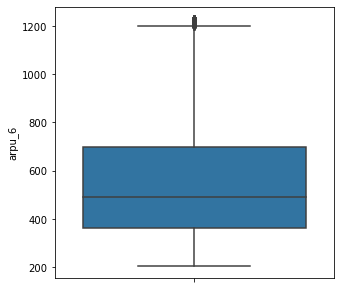

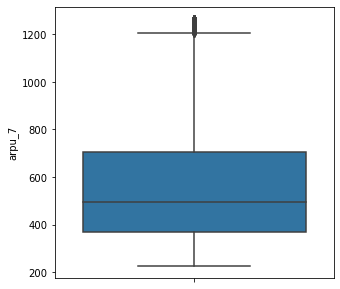

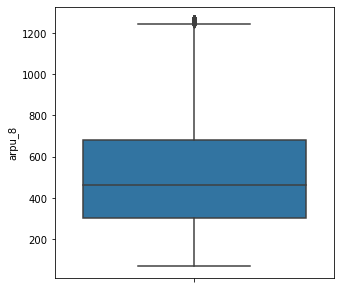

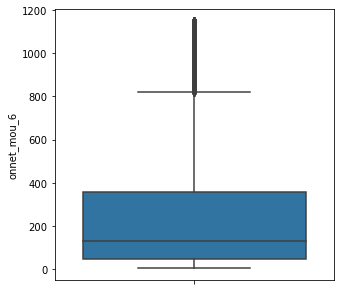

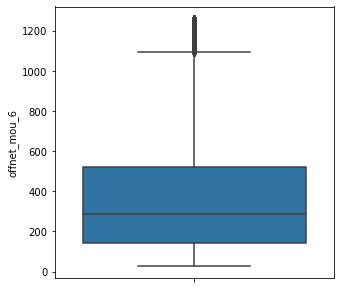

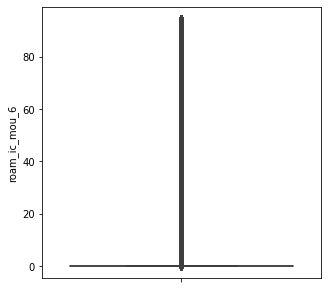

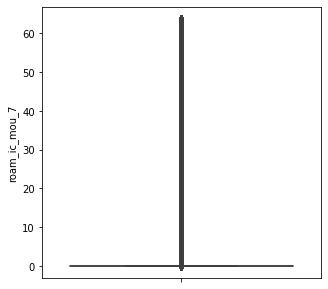

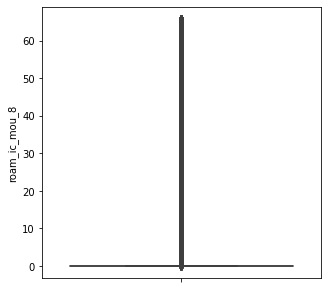

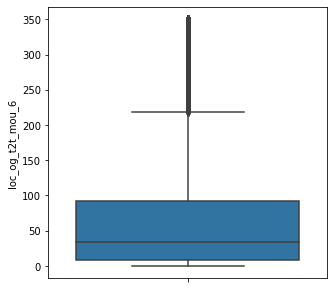

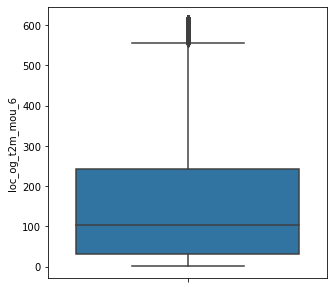

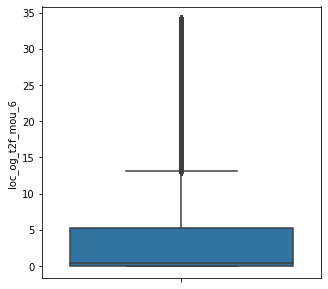

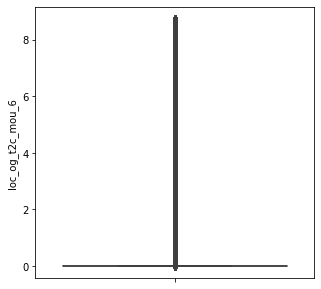

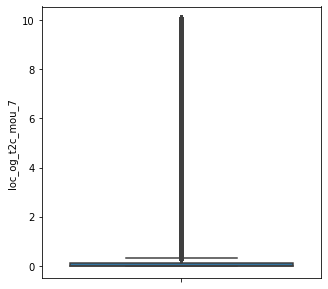

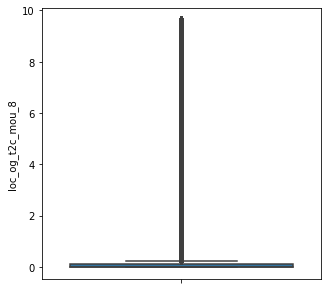

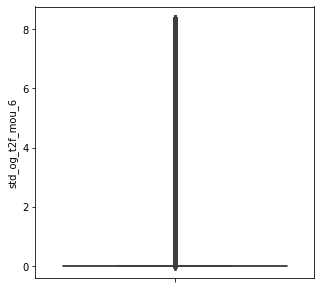

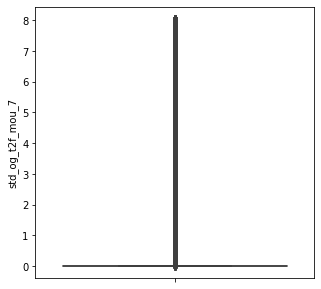

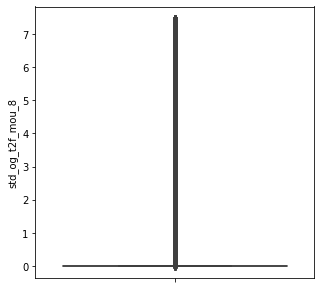

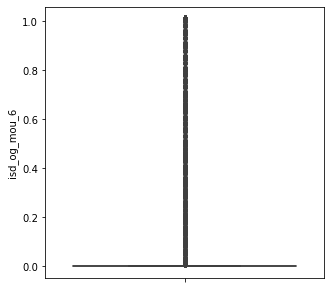

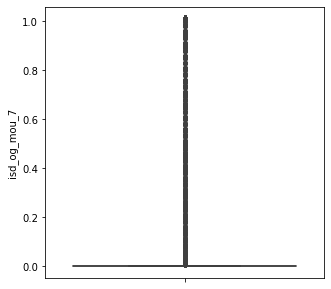

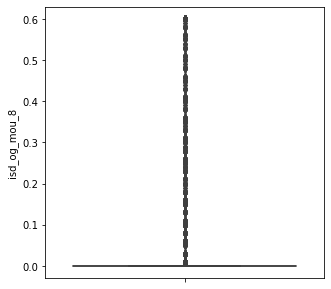

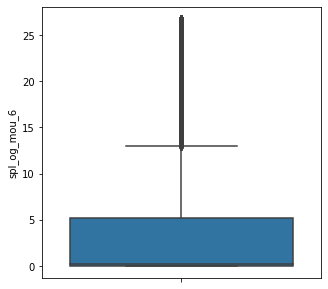

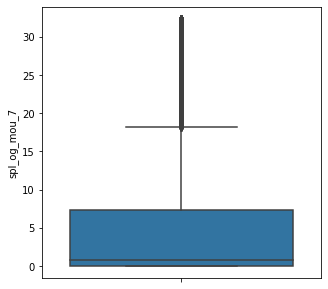

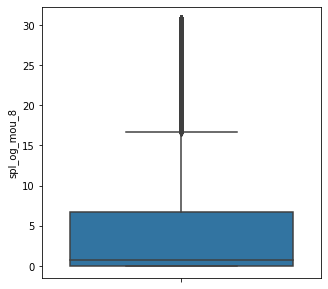

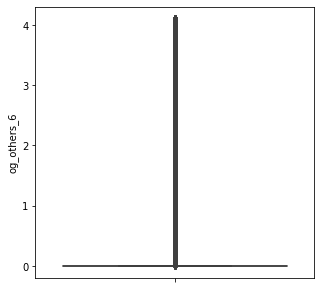

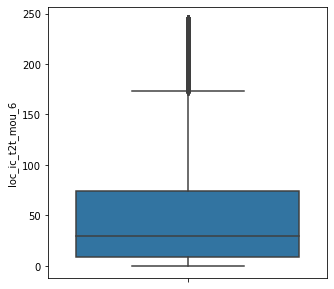

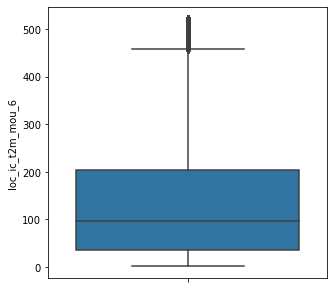

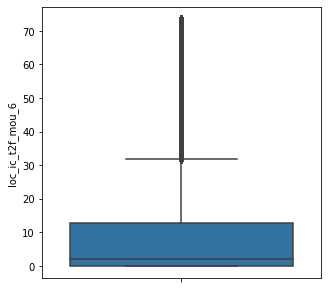

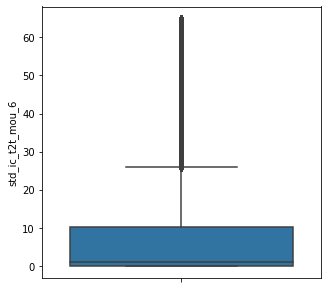

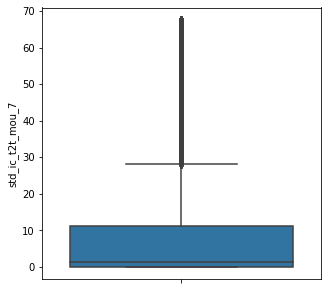

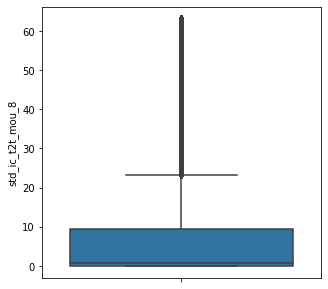

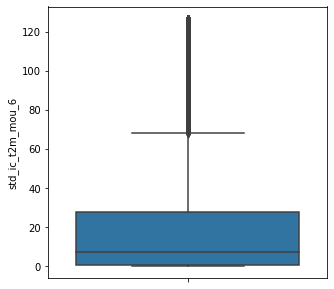

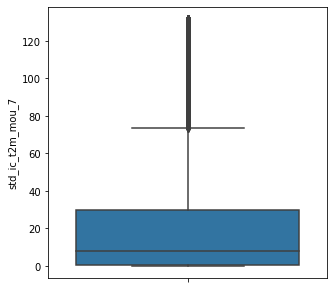

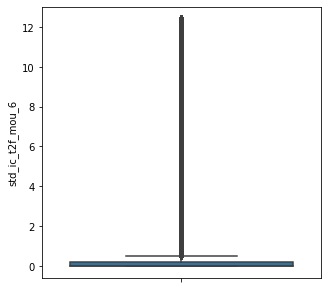

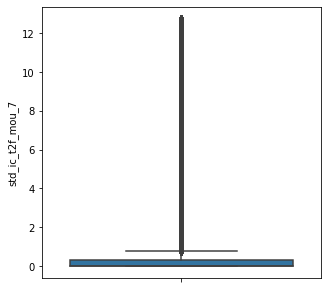

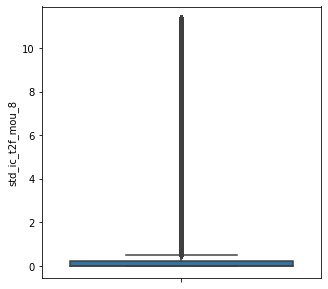

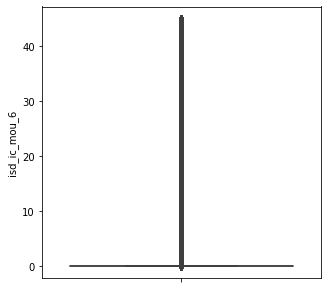

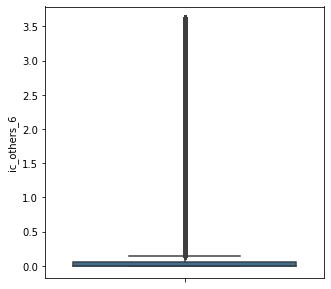

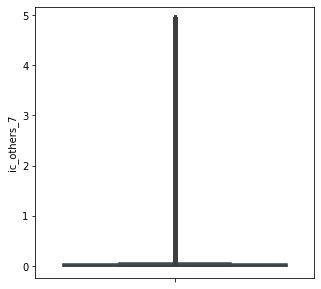

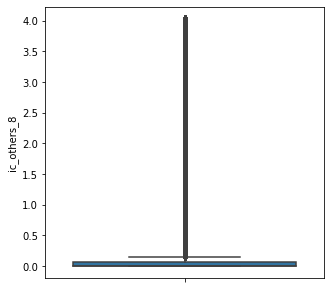

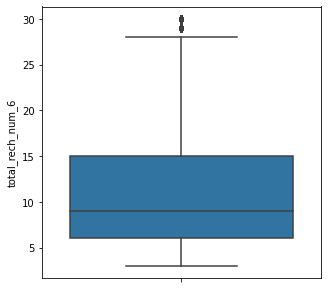

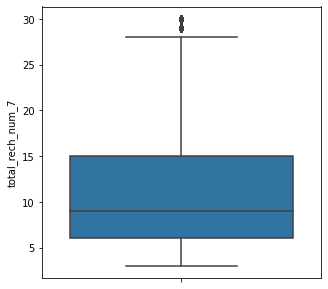

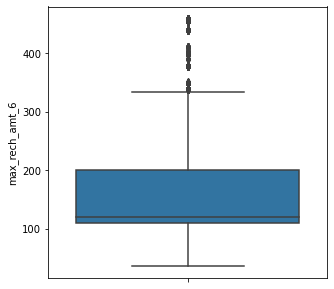

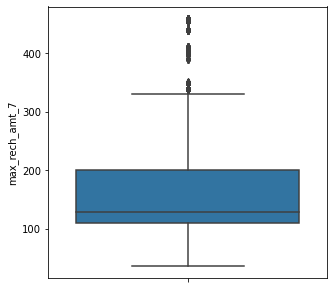

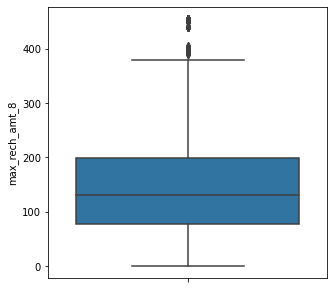

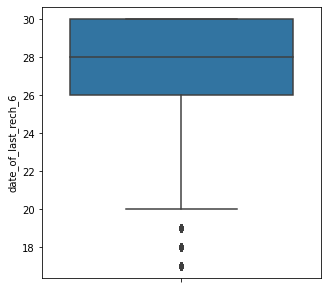

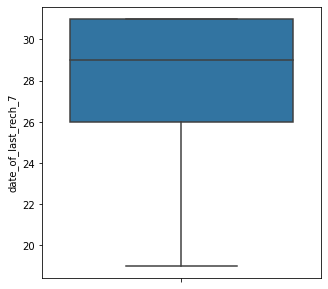

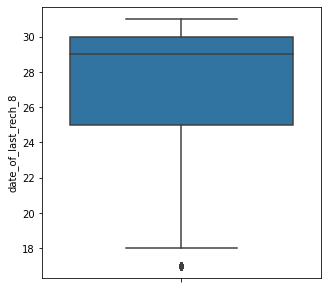

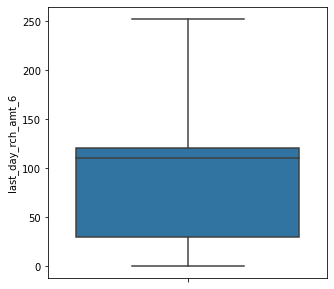

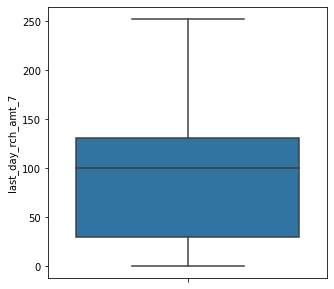

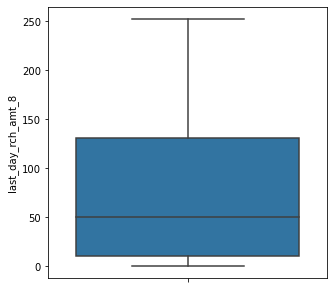

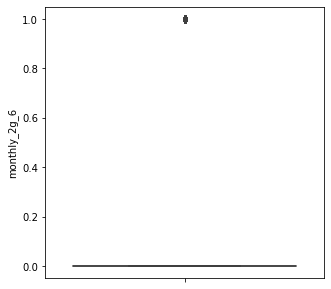

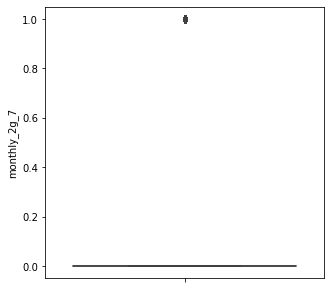

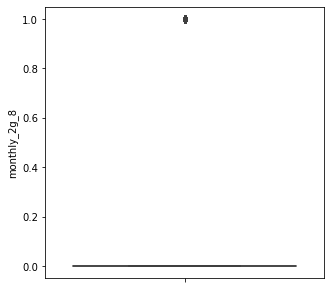

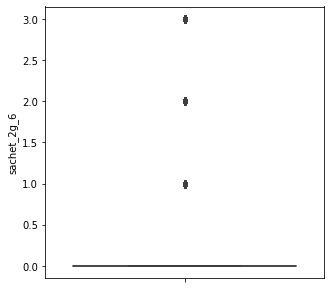

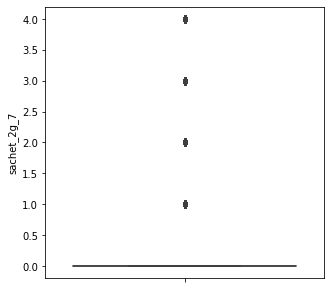

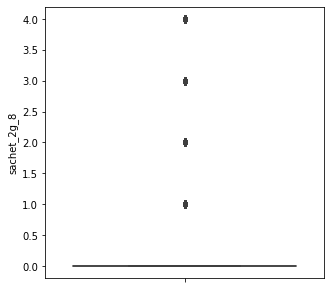

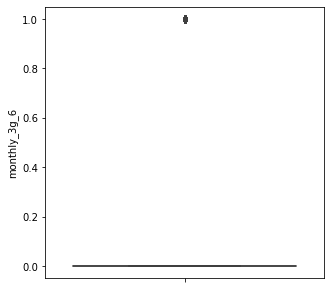

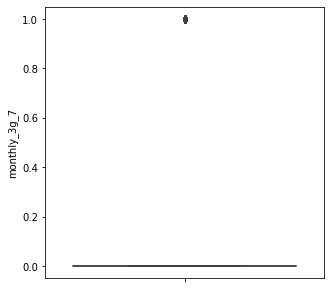

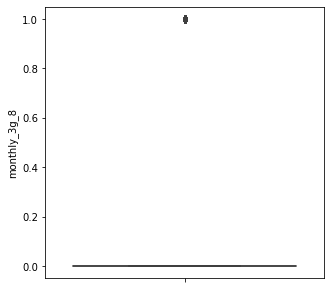

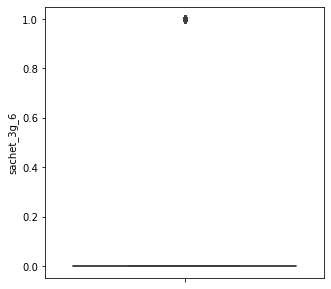

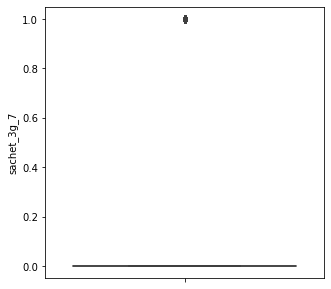

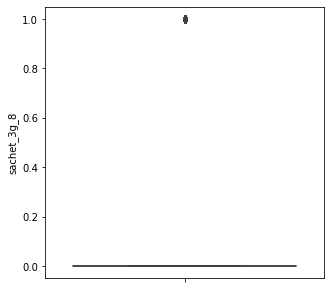

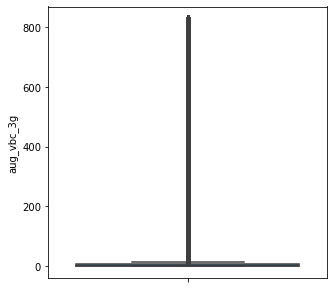

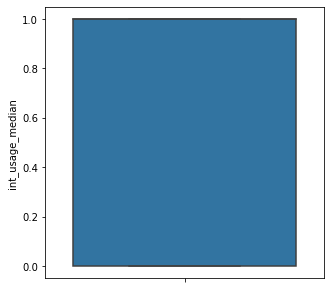

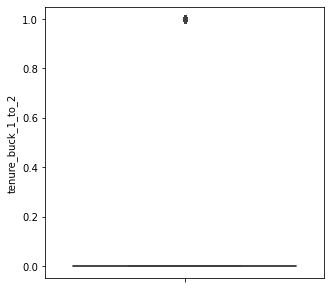

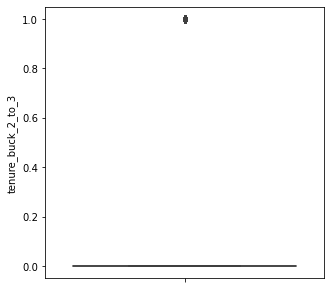

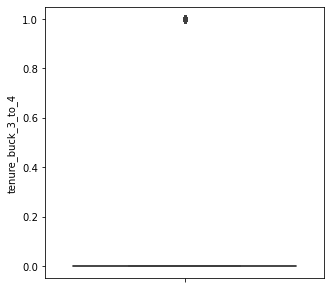

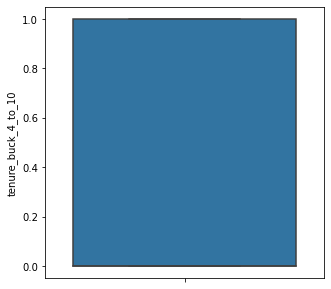

In [41]:
# Plotting the boxplot
cont_cols = [col for col in telecom_df2.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.boxplot(y=col, data=telecom_df2)

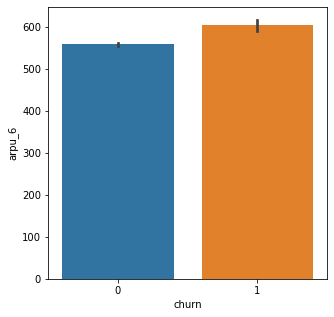

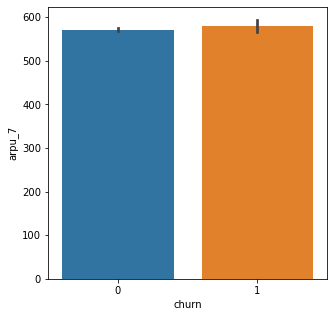

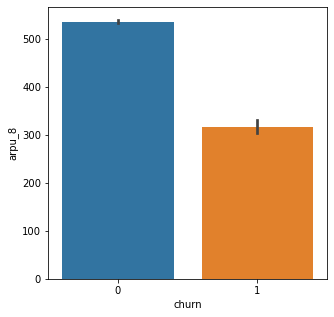

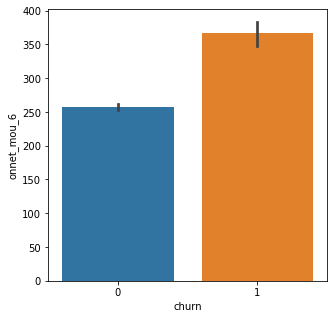

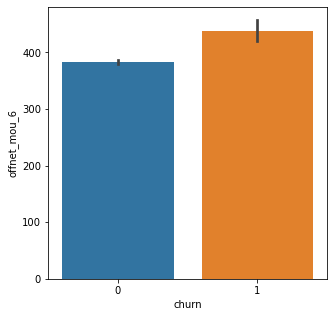

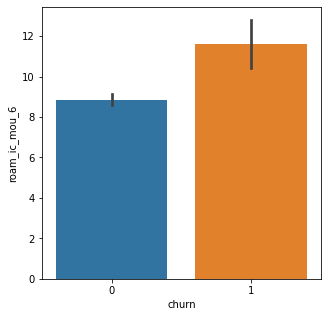

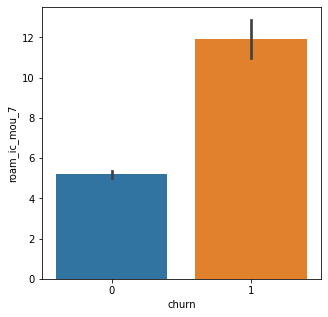

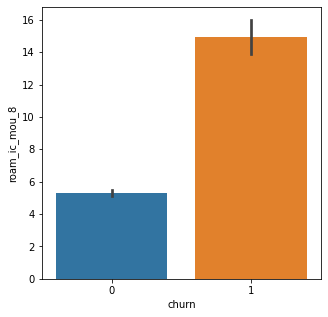

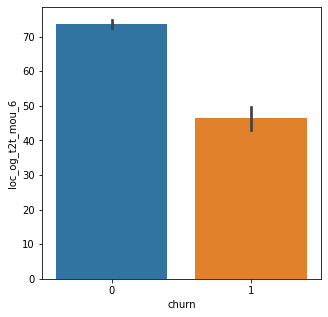

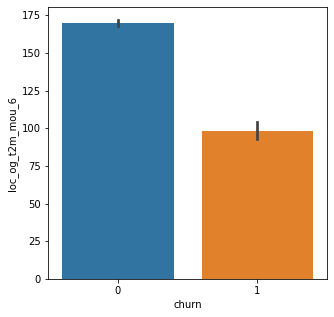

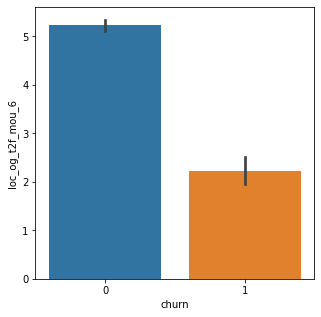

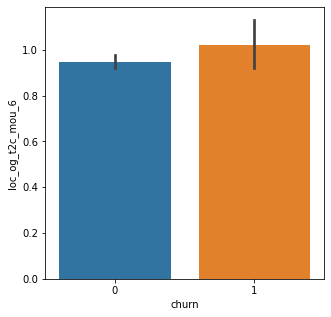

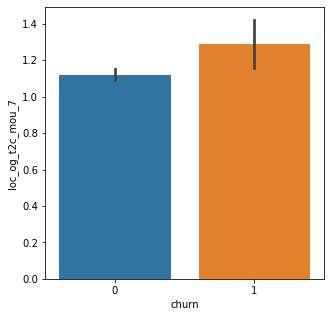

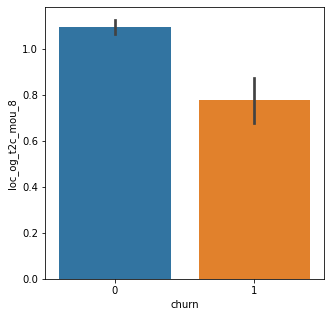

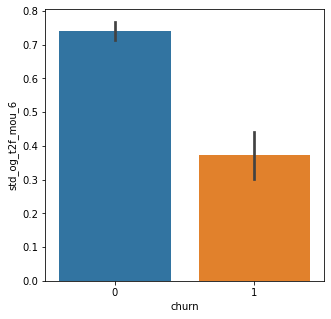

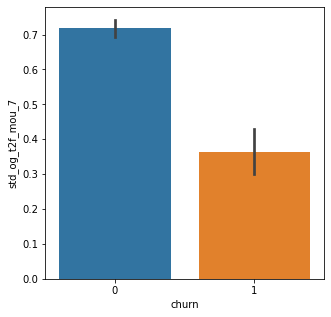

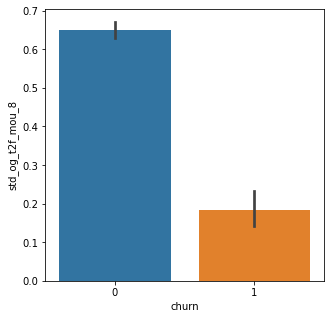

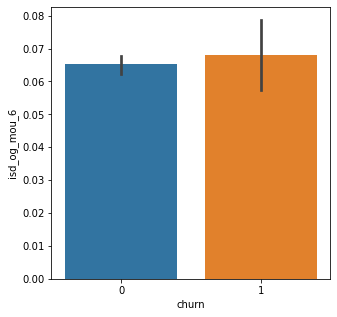

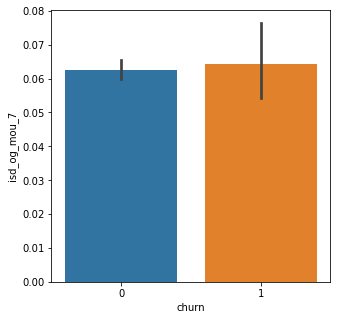

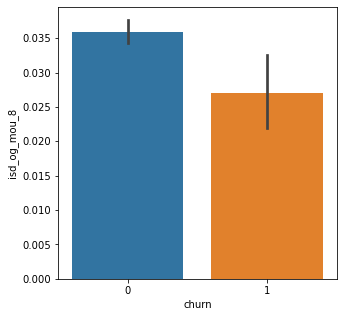

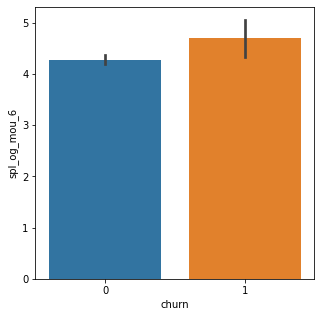

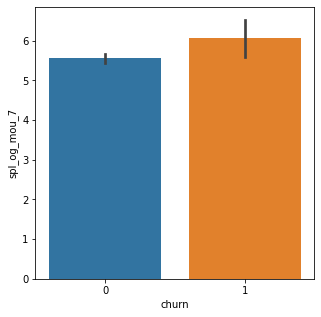

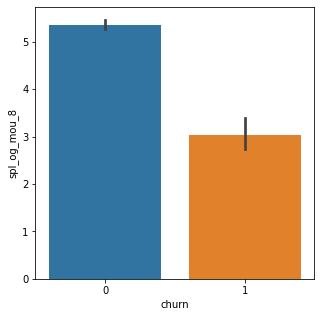

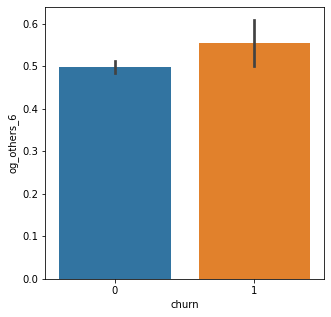

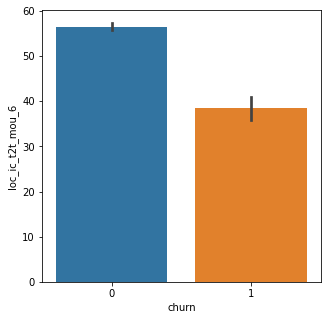

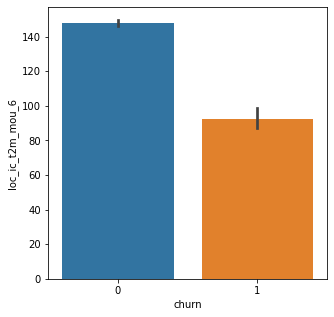

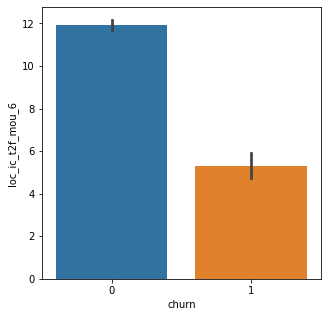

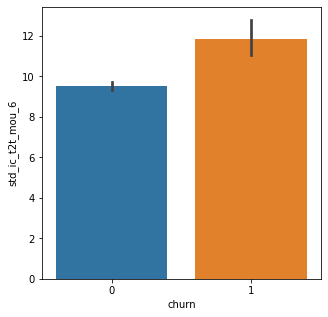

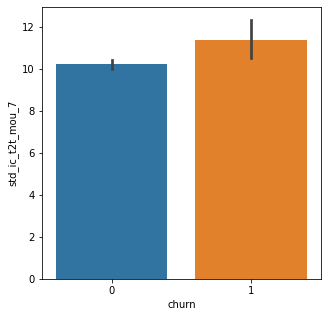

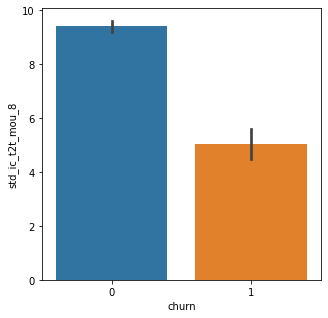

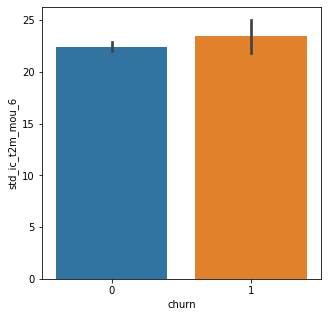

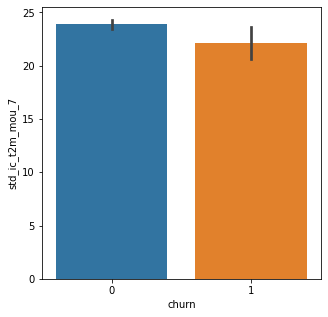

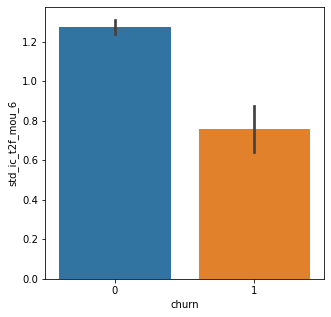

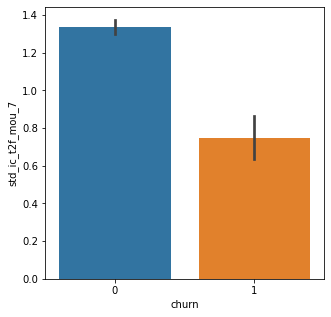

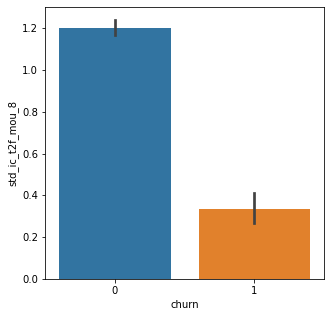

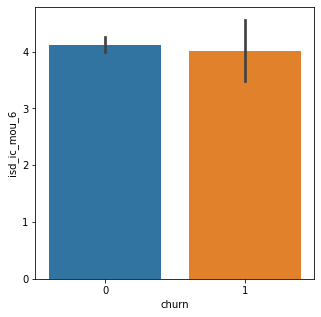

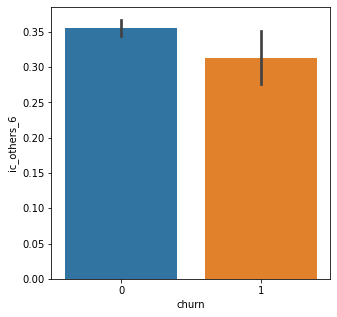

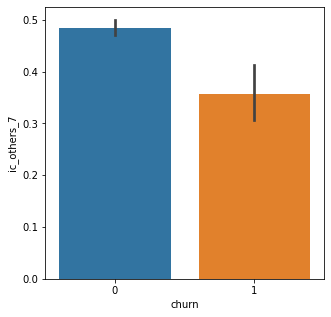

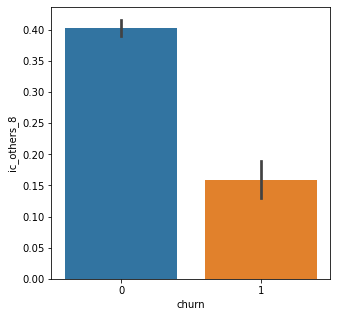

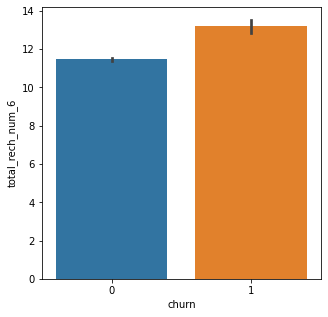

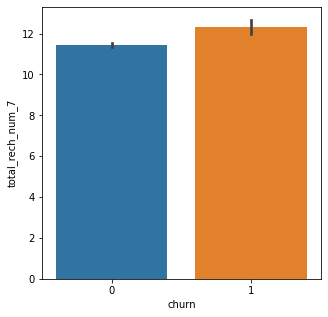

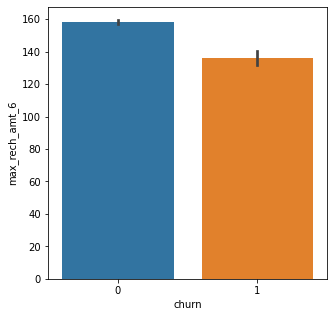

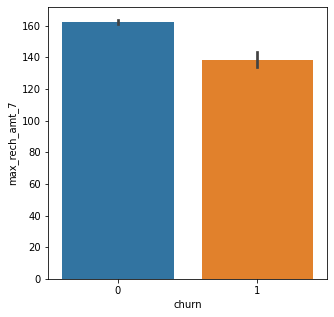

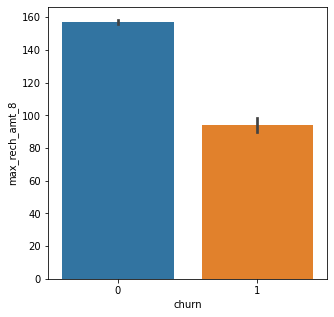

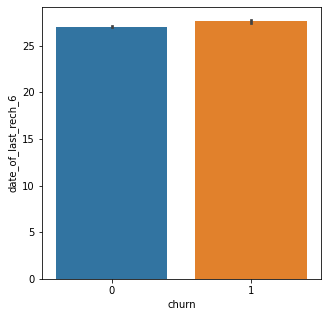

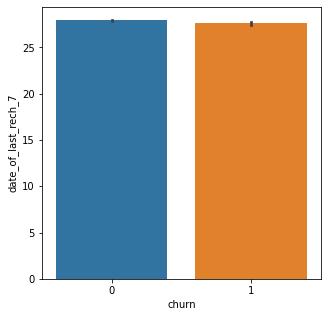

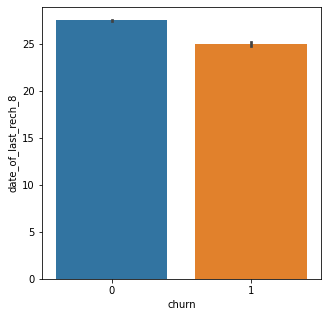

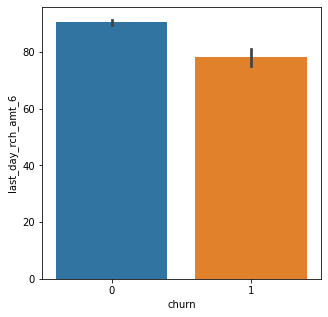

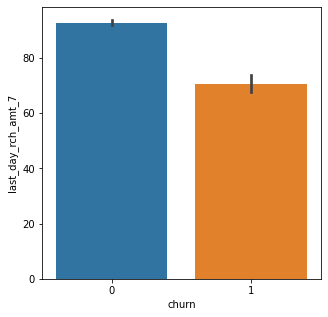

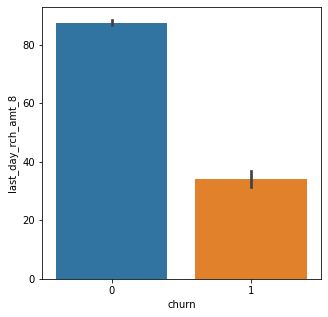

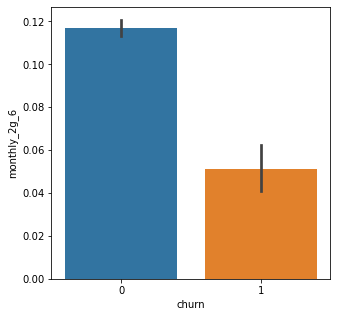

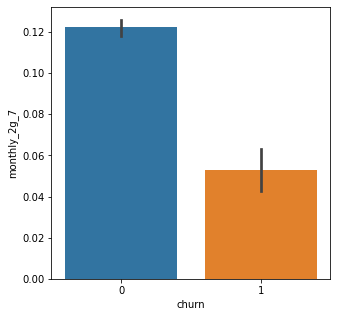

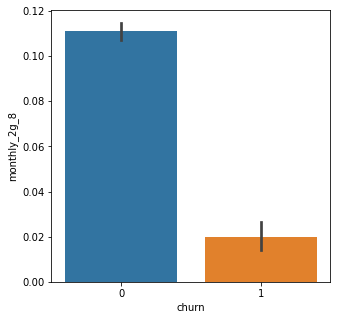

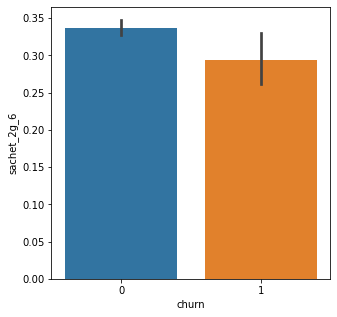

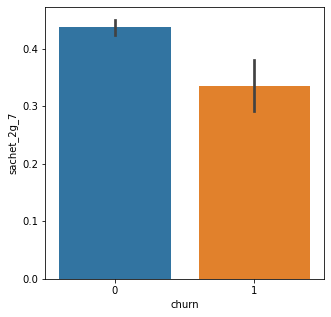

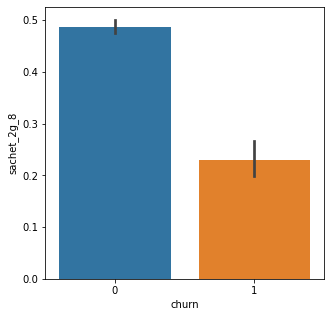

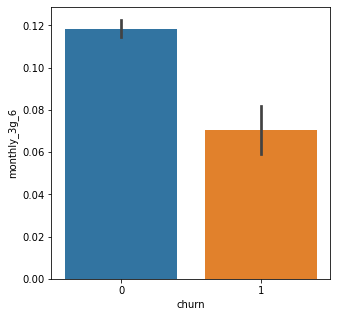

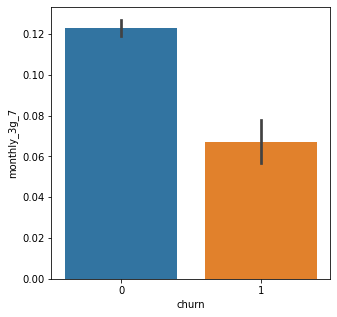

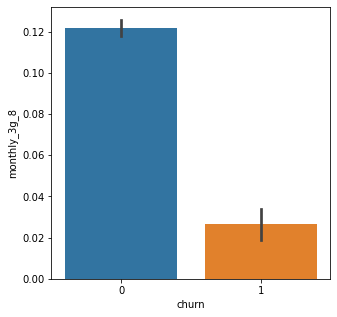

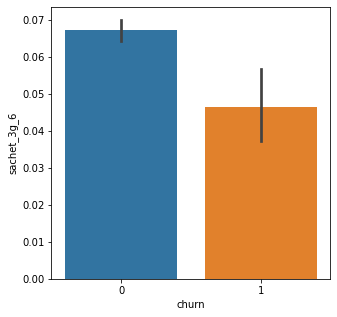

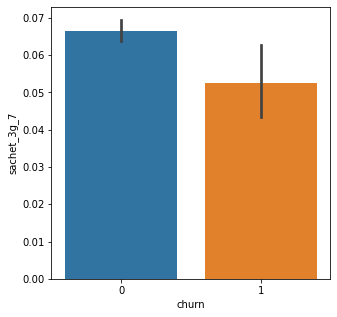

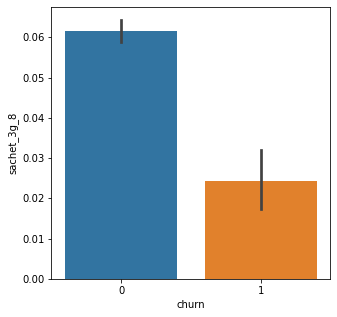

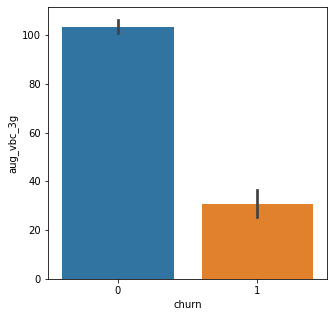

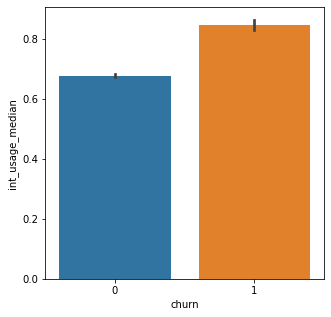

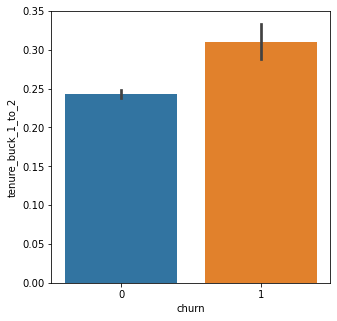

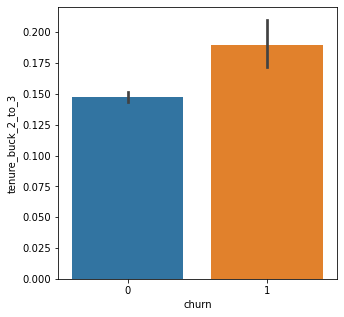

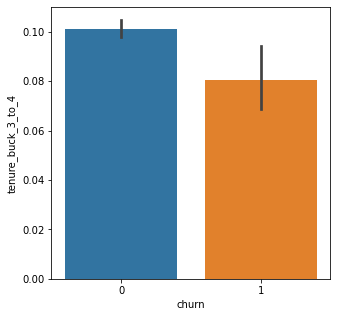

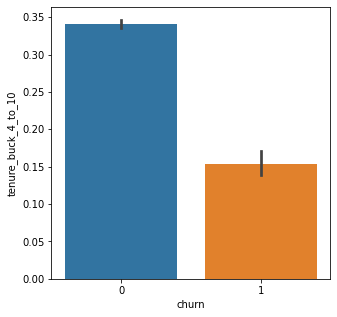

In [43]:
# plotting barplot
cont_cols = [col for col in telecom_df2.columns if col not in ['churn','mobile_number']]
for col in cont_cols:
    plt.figure(figsize=(5, 5))
    sns.barplot(x='churn', y=col, data=telecom_df2)
    plt.show()

[Text(0, 0.5, '(%)')]

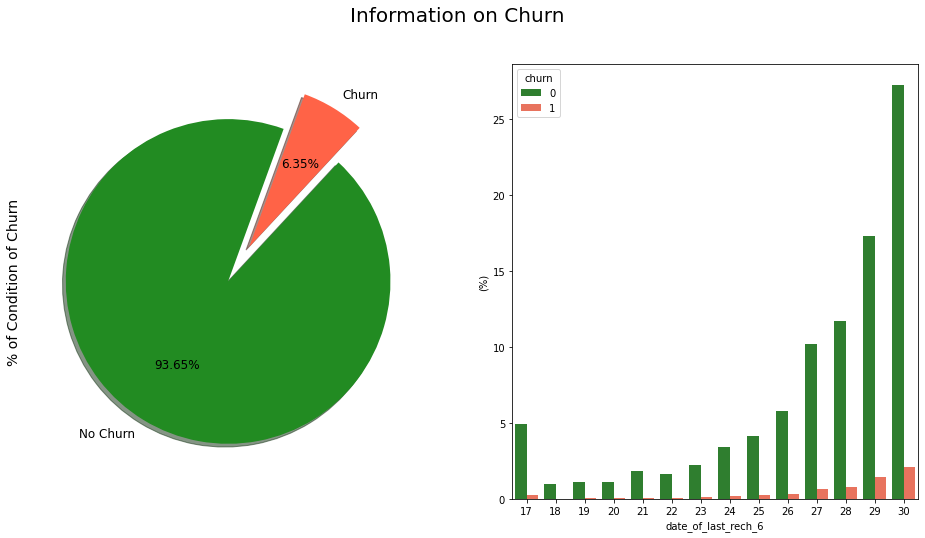

In [44]:
f, ax = plt.subplots(1,2, figsize=(16,8))
colors = ["#228B22", "#FF6347"]
labels ="No Churn", "Churn"
plt.suptitle('Information on Churn', fontsize=20)
# Plie plot for the fraction  of churn
telecom_df2["churn"].value_counts().plot.pie(explode=[0,0.25], autopct='%1.2f%%', ax=ax[0], shadow=True, colors=colors, labels=labels, fontsize=12, startangle=70)
ax[0].set_ylabel('% of Condition of Churn', fontsize=14)
palette = ["#228B22", "#FF6347"]
# Barplot of variable "date_of_last_rech_6" with target variable
sns.barplot(x="date_of_last_rech_6", y="churn", hue="churn", data=telecom_df2, palette=palette, estimator=lambda x: len(x) / len(telecom_df2) * 100)
ax[1].set(ylabel="(%)")

<AxesSubplot:xlabel='date_of_last_rech_8', ylabel='churn'>

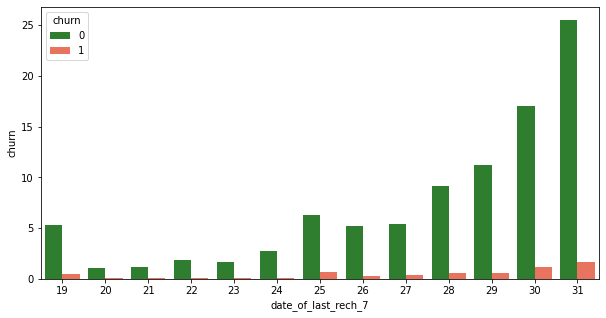

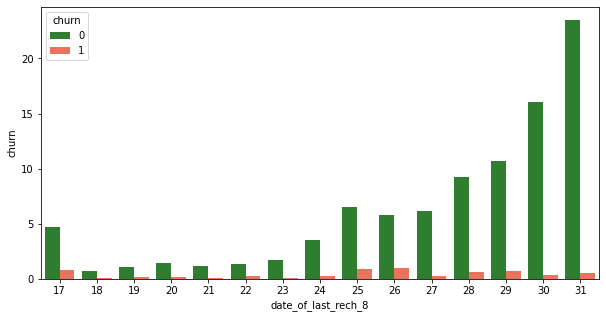

In [45]:
# Plot of variable "date_of_last_rech_7" with target variable
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_7", y="churn", hue="churn", data=telecom_df2, palette=palette, estimator=lambda x: len(x) / len(telecom_df2) * 100)
# plot of the variable "date_of_last_rech_8" with target variable
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_df2, palette=palette, estimator=lambda x: len(x) / len(telecom_df2) * 100)

# MODEL BUILDING

In [46]:
# Putting feature variable to X
X = telecom_df2.drop(['churn','mobile_number'],axis=1)
# Putting response variable to y
y = telecom_df2['churn']
# defining a normalisation function 
def normalize (x): 
    return ( (x-np.min(x))/ (max(x) - min(x)))
                                                                                          
# applying normalize ( ) to all columns 
X_norm = X.apply(normalize) 
X_norm.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,offnet_mou_6,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,loc_og_t2t_mou_6,loc_og_t2m_mou_6,...,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aug_vbc_3g,int_usage_median,tenure_buck_1_to_2,tenure_buck_2_to_3,tenure_buck_3_to_4,tenure_buck_4_to_10
7,0.843546,1.000000,1.000000,0.046956,0.345394,0.171782,0.525086,0.480815,0.146541,0.500181,...,0.0,0.0,0.0,0.0,0.069703,1.0,0.0,1.0,0.0,0.0
8,0.168996,0.255780,0.055902,0.357189,0.053886,0.000000,0.000000,0.000000,0.847279,0.129454,...,0.0,0.0,0.0,0.0,0.025387,0.0,0.0,0.0,0.0,0.0
13,0.280491,0.000000,0.436553,0.433969,0.312796,0.249047,1.000000,1.000000,0.141522,0.243716,...,0.0,0.0,0.0,0.0,0.000000,1.0,0.0,0.0,0.0,1.0
16,0.220046,0.070426,0.098093,0.040565,0.217715,0.000000,0.044371,0.000000,0.121504,0.442635,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0
17,0.473110,0.000000,0.000000,1.000000,0.027057,0.000000,0.074632,0.073095,0.111182,0.092946,...,0.0,0.0,0.0,0.0,0.000000,1.0,1.0,0.0,0.0,0.0


In [47]:
# Test and train split
X_train, X_test, y_train, y_test = train_test_split(X_norm, y, train_size=0.7,test_size=0.3,random_state=100)
# Displaying the shapes of test and train sets
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (20374, 68)
Number transactions y_train dataset:  (20374,)
Number transactions X_test dataset:  (8732, 68)
Number transactions y_test dataset:  (8732,)


In [48]:
# number of churned and notchurned in training data before data balancing
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

Before OverSampling, counts of label '1': 1308
Before OverSampling, counts of label '0': 19066 



In [49]:
# number of churned and notchurned in tset data before data balancing
print("Before OverSampling, counts of label '1': {}".format(sum(y_test==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_test==0)))

Before OverSampling, counts of label '1': 540
Before OverSampling, counts of label '0': 8192 



# PCA

In [50]:
# Calling PCA function
pca = PCA(svd_solver='randomized', random_state=42)

In [51]:
# PCA on the train data
pca.fit(X_train)

PCA(random_state=42, svd_solver='randomized')

In [52]:
# Printing pca components
print(pca.components_)

[[ 0.06908084  0.06990218  0.09493563 ... -0.05692183 -0.01000414
   0.28219524]
 [ 0.05245141  0.08092243  0.06635951 ...  0.05012403  0.01343102
  -0.31714208]
 [ 0.28010036  0.25553523  0.22922272 ...  0.02006499 -0.00478855
  -0.02313722]
 ...
 [-0.34984747  0.14173979 -0.33127648 ... -0.01189    -0.00219669
  -0.00061229]
 [-0.46950222 -0.31888877  0.37847455 ... -0.00053802  0.01100892
   0.00316065]
 [-0.4463292   0.38926848  0.0119775  ...  0.00130102  0.00646225
   0.00486514]]


In [53]:
# Taking top 10 PCA function
colnames = list(X_train.columns)
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 
                       'PC3':pca.components_[2],'PC4':pca.components_[3],
                       'PC5':pca.components_[4],'PC6':pca.components_[5],
                       'PC7':pca.components_[6],'PC8':pca.components_[7],
                       'PC9':pca.components_[8],'PC10':pca.components_[9],
                       'Feature':colnames})
pcs_df.head(10)

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,Feature
0,0.069081,0.052451,0.280100,0.036374,-0.102153,0.133530,-0.137132,-0.143078,-0.104811,-0.000317,arpu_6
1,0.069902,0.080922,0.255535,0.080979,-0.101428,0.052615,-0.141941,-0.094334,-0.131735,0.153600,arpu_7
2,0.094936,0.066360,0.229223,0.058829,-0.089694,0.042950,-0.122582,-0.077121,-0.123528,0.181394,arpu_8
3,-0.076996,-0.019689,0.153643,0.045103,-0.055901,0.005736,-0.141517,-0.036364,-0.142088,-0.147840,onnet_mou_6
4,-0.013116,-0.041241,0.239221,-0.007471,-0.041742,0.181352,-0.074881,-0.111089,-0.020393,0.037405,offnet_mou_6
5,0.024127,-0.010244,0.029902,0.084063,0.036878,-0.142153,-0.041664,-0.045721,-0.105153,0.063140,roam_ic_mou_6
6,0.022521,-0.010810,0.043735,0.087877,0.046976,-0.107806,-0.044315,-0.062201,-0.085544,0.014952,roam_ic_mou_7
7,0.025322,-0.007183,0.057081,0.079587,0.049439,-0.106083,-0.040621,-0.064589,-0.085586,0.025501,roam_ic_mou_8
8,0.070854,-0.058593,0.137188,-0.128024,-0.068045,0.193204,-0.024892,-0.095166,0.015789,-0.170671,loc_og_t2t_mou_6
9,0.106156,-0.082477,0.184811,-0.158919,-0.063218,0.284422,-0.000178,-0.124948,0.063095,-0.056255,loc_og_t2m_mou_6


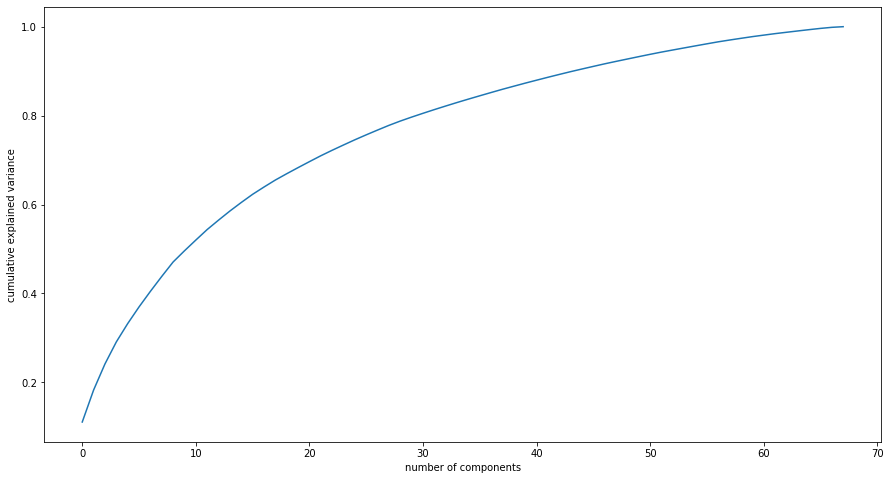

In [54]:
# plotting the number of components and cumulative variance graph
%matplotlib inline
fig = plt.figure(figsize = (15,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

*As we can see 40 component explain 90% of variance in the data

In [55]:
# Creating incremental PCA model with 40 elements
pca_final = IncrementalPCA(n_components=40)
# Fitting the model
df_train_pca = pca_final.fit_transform(X_train)
# Displaying the shape of the model
df_train_pca.shape

(20374, 40)

In [56]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(df_train_pca.transpose())

<AxesSubplot:>

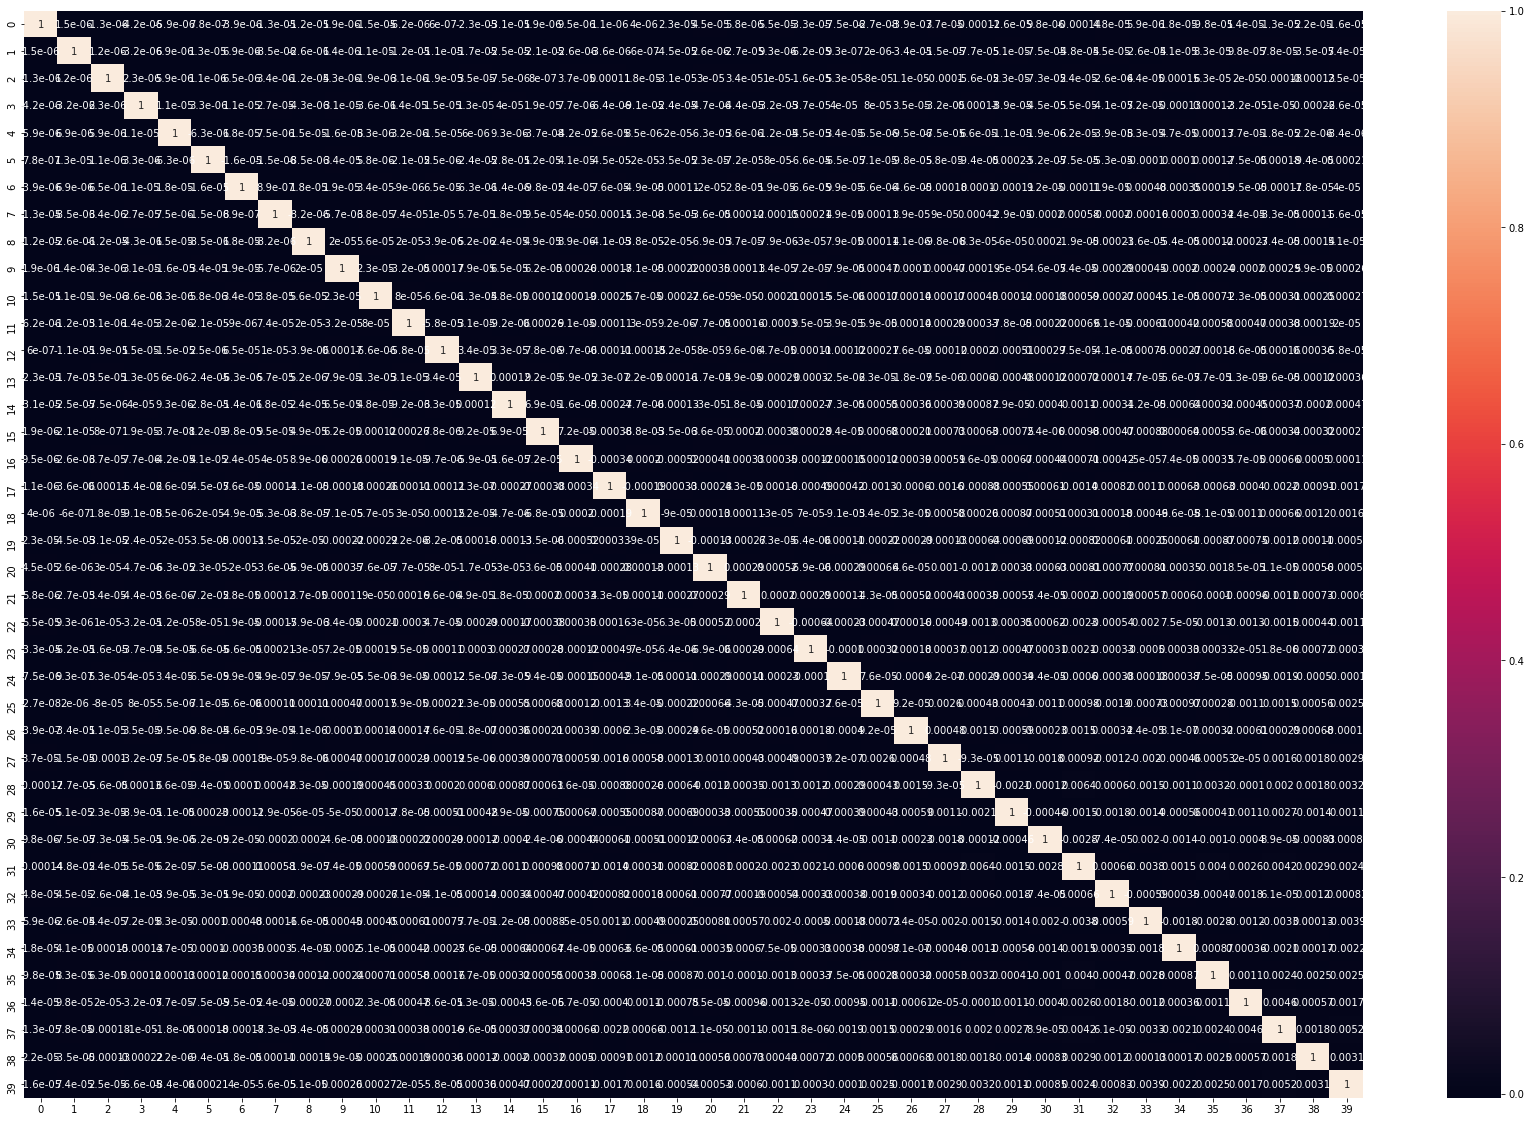

In [57]:
#plotting the correlation matrix
%matplotlib inline
plt.figure(figsize = (30,20))
sns.heatmap(corrmat,annot = True)

In [58]:
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.006442400757629931 , min corr:  -0.0038977645047407424


In [59]:
#Applying selected components to the test data - 20 components
df_test_pca = pca_final.transform(X_test)
df_test_pca.shape

(8732, 40)

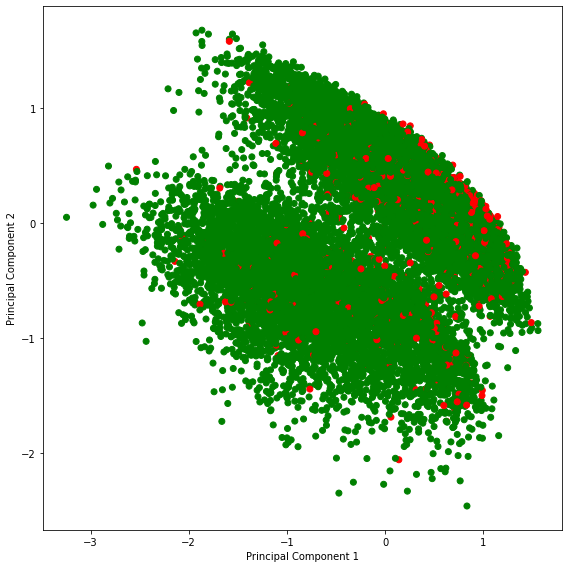

In [60]:
# Plotting the scatter plot
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(df_train_pca[:,0], df_train_pca[:,1], c = y_train.map({0:'green',1:'red'}))
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.tight_layout()
plt.show()

# LogisticRegression model with PCA

In [61]:
#Training the model on the train data
learner_pca = LogisticRegression(class_weight='balanced')
model_pca = learner_pca.fit(df_train_pca,y_train)



In [62]:
# Making prediction on the test data
pred_probs_test = model_pca.predict_proba(df_test_pca)[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [63]:
#Making prediction on the test data
pred_test = model_pca.predict_proba(df_test_pca)
y_pred_default = model_pca.predict(df_test_pca)

In [64]:
# print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print(accuracy_score(y_test,y_pred_default))

[[6632 1560]
 [ 104  436]]
0.809436555199267


In [65]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]

# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)

# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [66]:
# Printing ROC score
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC score: ',roc_auc)

ROC_AUC score:  0.8728834364149305


In [67]:
# Plotting ROC Curve
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(6, 6))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return fpr, tpr, thresholds

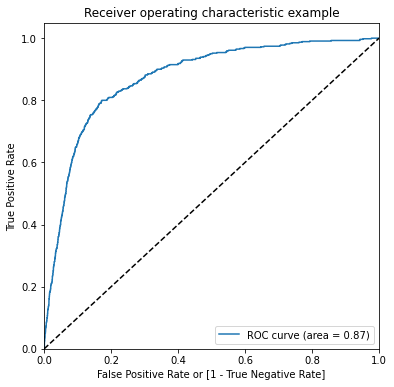

(array([0.00000000e+00, 1.22070312e-04, 1.22070312e-04, ...,
        9.99755859e-01, 9.99877930e-01, 1.00000000e+00]),
 array([0.        , 0.        , 0.00185185, ..., 1.        , 1.        ,
        1.        ]),
 array([1.99706698e+00, 9.97066978e-01, 9.96869705e-01, ...,
        5.96982841e-04, 3.75824365e-04, 2.92190956e-04]))

In [68]:
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [69]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.555371,1,1,1,1,1,1,0,0,0,0
1,0,0.043774,1,0,0,0,0,0,0,0,0,0
2,0,0.031103,1,0,0,0,0,0,0,0,0,0
3,0,0.148934,1,1,0,0,0,0,0,0,0,0
4,0,0.470662,1,1,1,1,1,0,0,0,0,0


In [70]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.061842  0.000000  1.000000
0.1   0.1  0.332913  0.290405  0.977778
0.2   0.2  0.507902  0.478516  0.953704
0.3   0.3  0.643610  0.625854  0.912963
0.4   0.4  0.737861  0.730225  0.853704
0.5   0.5  0.809437  0.809570  0.807407
0.6   0.6  0.857536  0.865112  0.742593
0.7   0.7  0.891090  0.907837  0.637037
0.8   0.8  0.912391  0.942139  0.461111
0.9   0.9  0.928195  0.972900  0.250000


<AxesSubplot:xlabel='prob'>

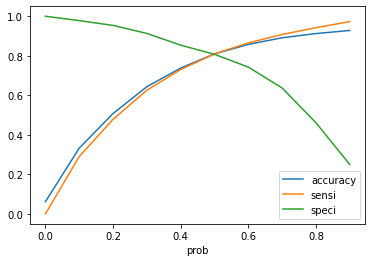

In [71]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [72]:
## Finidng the optimal cutoff
import sys
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
    roc = pd.DataFrame({'tf' : pd.Series(tpr-(1-fpr), index=i), 'threshold' : pd.Series(threshold, index=i)})
    

    
# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('Threshold: ',threshold)

Threshold:  None


In [73]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.49 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.49 else 0)

y_pred_final.churn.value_counts()

0    8192
1     540
Name: churn, dtype: int64

In [74]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6582, 1610],
       [ 103,  437]])

# Logistic Regression model matrics with PCA

In [75]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives
print('Accuracy Score on test data: ', accuracy_score(y_test,y_pred_default))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))
# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))
# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))
# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))
# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))
## Misclassification rate
print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score on test data:  0.809436555199267
Sensitivity:  0.8092592592592592
Specificity:  0.803466796875
false postive rate:  0.196533203125
positive predictive value:  0.21348314606741572
Negative predictive value:  0.9845923709798056
Misclassification Rate:  0.1961749885478699


# Logistc Regression model with RFE

In [76]:
# Logistic regression model with the balanced dataset
logreg = LogisticRegression(class_weight='balanced')
# running RFE with 40 variables as output as PCA gave 40
rfe = RFE(logreg, 10)             
rfe = rfe.fit(X_norm,y)
# Printing the boolean results
print(rfe.support_)           
print(rfe.ranking_)

[ True  True  True False False False False  True False  True False False
 False False False False False False False False False False False False
 False False  True False False False False False False False False False
 False False False False False False False False False False  True False
 False  True False False  True False False False False False  True False
 False False False False False False False False]
[ 1  1  1 18 17  8  9  1  7  1 28 55 58 21 29 45 20 22 33 15 32 24 14 42
 52 53  1 34  5  4 46 16 19 38  2 43 59 51 11 47 26 49 39 57 56 44  1 25
 27  1 23 54  1 48 41  3 50 12  1 37 31 30 10 36 35 40 13  6]


In [77]:
col = X_train.columns[rfe.support_]
col

Index(['arpu_6', 'arpu_7', 'arpu_8', 'roam_ic_mou_8', 'loc_og_t2m_mou_6',
       'loc_ic_t2f_mou_6', 'date_of_last_rech_8', 'last_day_rch_amt_8',
       'monthly_2g_8', 'monthly_3g_8'],
      dtype='object')

In [78]:
# UDF for calculating vif value
def vif_cal(input_data, dependent_col):
    vif_df = pd.DataFrame( columns = ['Var', 'Vif'])
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(y,x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        vif_df.loc[i] = [xvar_names[i], vif]
    return vif_df.sort_values(by = 'Vif', axis=0, ascending=False, inplace=False)

<AxesSubplot:>

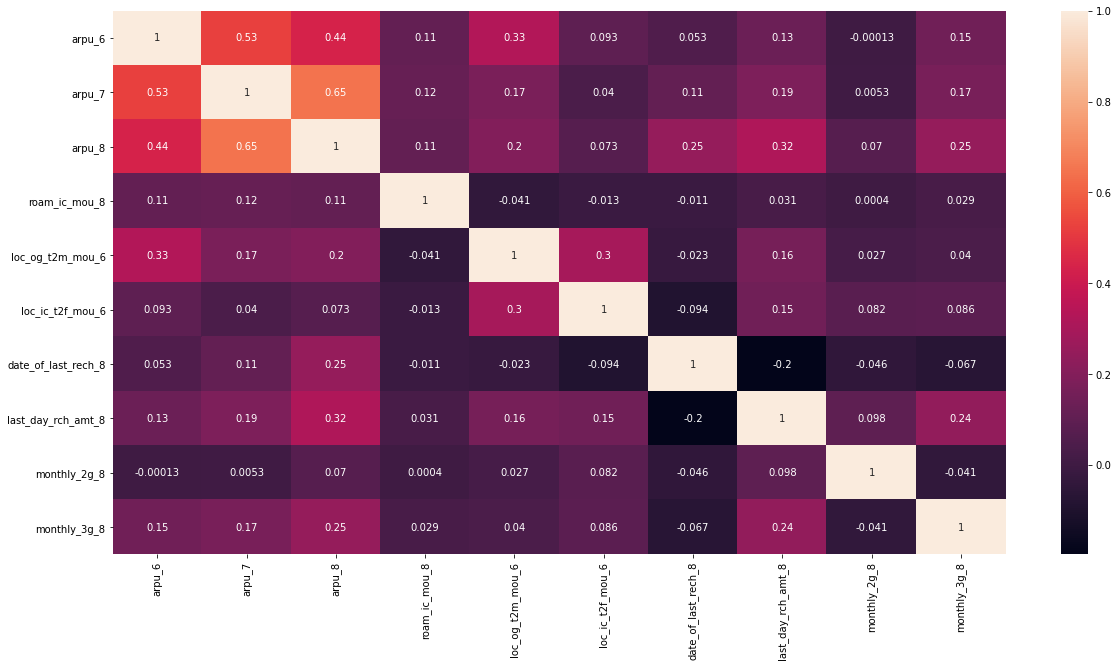

In [79]:
# Let's see the correlation matrix 
plt.figure(figsize = (20,10))       
sns.heatmap(X_norm[col].corr(),annot = True)

In [80]:
# VIF value
col_for_vif = list(col)
col_for_vif.append('churn')
vif_cal(input_data=telecom_df2[col_for_vif], dependent_col='churn')

,Var,Vif
1,arpu_7,10.28
0,arpu_6,7.99
2,arpu_8,7.66
6,date_of_last_rech_8,6.77
7,last_day_rch_amt_8,2.41
4,loc_og_t2m_mou_6,2.40
5,loc_ic_t2f_mou_6,1.50
9,monthly_3g_8,1.27
3,roam_ic_mou_8,1.16
8,monthly_2g_8,1.14


VIF looks good now will select these coloum for creating LogisticRegression

In [81]:
# Let's run the model using the selected variables
logsk = LogisticRegression(class_weight='balanced')
logsk.fit(X_train[col], y_train)

LogisticRegression(class_weight='balanced')

In [82]:
#Making prediction on the test data calculate roc score
pred_probs_test = logsk.predict_proba(X_test[col])[:,1]
"{:2.2}".format(metrics.roc_auc_score(y_test, pred_probs_test))

'0.87'

In [83]:
#Making prediction on the test data
pred_test = logsk.predict_proba(X_test[col])
y_pred_default = logsk.predict(X_test[col])

In [84]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score : ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.99      0.81      0.89      8192
           1       0.22      0.83      0.35       540

    accuracy                           0.81      8732
   macro avg       0.60      0.82      0.62      8732
weighted avg       0.94      0.81      0.86      8732

[[6643 1549]
 [  94  446]]
accuracy_score :  0.8118415025194686


In [85]:
# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(pred_test)
# Converting to column dataframe
y_pred_1 = y_pred_df.iloc[:,[1]]
# Removing index for both dataframes to append them side by side 
y_pred_1.reset_index(drop=True, inplace=True)
y_test.reset_index(drop=True, inplace=True)
# Appending y_test_df and y_pred_1
y_pred_final = pd.concat([y_test,y_pred_1],axis=1)
# Renaming the column 
y_pred_final= y_pred_final.rename(columns={ 1 : 'churn_prob'})

In [86]:
# ROC score
fpr, tpr, thresholds =roc_curve(y_pred_final.churn,y_pred_final.churn_prob)
roc_auc = auc(fpr, tpr)
print('ROC_AUC Score: ',roc_auc)

ROC_AUC Score:  0.8681764955873843


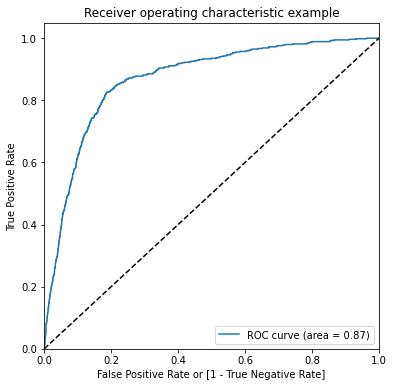

(array([0.00000000e+00, 1.22070312e-04, 2.44140625e-04, ...,
        9.99755859e-01, 9.99877930e-01, 1.00000000e+00]),
 array([0., 0., 0., ..., 1., 1., 1.]),
 array([1.99749309e+00, 9.97493092e-01, 9.96297985e-01, ...,
        6.05956591e-04, 5.03108248e-04, 4.15316994e-04]))

In [87]:
# Plotting ROC Curve
draw_roc(y_pred_final.churn, y_pred_final.churn_prob)

In [88]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_pred_final[i]= y_pred_final.churn_prob.map( lambda x: 1 if x > i else 0)
y_pred_final.head()

,churn,churn_prob,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.571514,1,1,1,1,1,1,0,0,0,0
1,0,0.046417,1,0,0,0,0,0,0,0,0,0
2,0,0.062763,1,0,0,0,0,0,0,0,0,0
3,0,0.105680,1,1,0,0,0,0,0,0,0,0
4,0,0.379171,1,1,1,1,0,0,0,0,0,0


In [89]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensi','speci'])
from sklearn.metrics import confusion_matrix
num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix( y_pred_final.churn, y_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    sensi = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    speci = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensi,speci]
print(cutoff_df)

     prob  accuracy     sensi     speci
0.0   0.0  0.061842  0.000000  1.000000
0.1   0.1  0.310467  0.266357  0.979630
0.2   0.2  0.485570  0.455322  0.944444
0.3   0.3  0.627233  0.608398  0.912963
0.4   0.4  0.744045  0.735474  0.874074
0.5   0.5  0.811842  0.810913  0.825926
0.6   0.6  0.853642  0.861572  0.733333
0.7   0.7  0.883761  0.901733  0.611111
0.8   0.8  0.910559  0.941406  0.442593
0.9   0.9  0.927164  0.973633  0.222222


<AxesSubplot:xlabel='prob'>

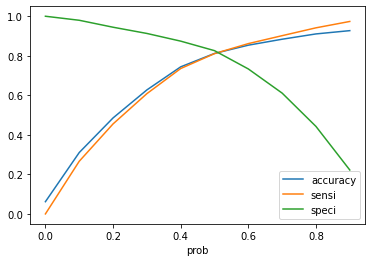

In [90]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensi','speci'])

In [91]:
## Finding the optimal cutoff
def Find_Optimal_Cutoff(target, predicted):

    fpr, tpr, threshold = roc_curve(target, predicted)
    i = np.arange(len(tpr)) 
   
 

# Find optimal probability threshold
threshold = Find_Optimal_Cutoff(y_pred_final.churn,y_pred_final.churn_prob)
print('CutOff threshold: ', threshold)

CutOff threshold:  None


In [92]:
# Creating new column 'predicted' with 1 if Churn_Prob > 0.50 else 0
y_pred_final['pred_churn'] = y_pred_final.churn_prob.map( lambda x: 1 if x > 0.50 else 0)

y_pred_final.churn.value_counts()

0    8192
1     540
Name: churn, dtype: int64

In [93]:
# Confusion matrix 
confusion = metrics.confusion_matrix( y_pred_final.churn, y_pred_final.pred_churn )
confusion

array([[6643, 1549],
       [  94,  446]])

In [94]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

print('Accuracy Score : ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

Accuracy Score :  0.8118415025194686
Sensitivity:  0.825925925925926
Specificity:  0.8109130859375
false postive rate:  0.1890869140625
positive predictive value:  0.22355889724310776
Negative predictive value:  0.9860472020187027


**As we can see Above LogisticRegression giving good Accuracy with PCA and with RFE

**With PCA

Accuracy Score on test data: 0.809436555199267

Sensitivity: 0.8092592592592592

Specificity: 0.803466796875

false postive rate: 0.196533203125

positive predictive value: 0.21348314606741572

Negative predictive value: 0.9845923709798056

Misclassification Rate: 0.1961749885478699

**With RFE

Accuracy Score : 0.8121850664223546

Sensitivity: 0.825925925925926

Specificity: 0.811279296875

false postive rate: 0.188720703125

positive predictive value: 0.22389558232931728

Negative predictive value: 0.986053412462908


# DecisionTreeClassifier With PCA

In [95]:
# Decision Tree
# Fitting the decision tree with default hyperparameters, apart from
# max_depth which is 5 so that we can plot and read the tree.
dt_default = DecisionTreeClassifier(max_depth=5, class_weight='balanced')
dt_default.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=5)

In [96]:
# Let's check the evaluation metrics of our default model

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Making predictions
y_pred_default = dt_default.predict(df_test_pca)

# # Printing classification report
# print(classification_report(y_test, y_pred_default))

# from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('Acuracy Score', accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.97      0.69      0.81      8192
           1       0.13      0.71      0.22       540

    accuracy                           0.69      8732
   macro avg       0.55      0.70      0.51      8732
weighted avg       0.92      0.69      0.77      8732

[[5636 2556]
 [ 154  386]]
Acuracy Score 0.6896472743930371


In [97]:
confusion_tree = confusion_matrix(y_test,y_pred_default)
TP = confusion_tree[1,1] # true positive 
TN = confusion_tree[0,0] # true negatives
FP = confusion_tree[0,1] # false positives
FN = confusion_tree[1,0] # false negatives

print('Acuracy Score', accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Acuracy Score 0.6896472743930371
Sensitivity:  0.7148148148148148
Specificity:  0.68798828125
false postive rate:  0.31201171875
positive predictive value:  0.13120326308633581
Negative predictive value:  0.9734024179620034
Misclassification Rate:  0.3103527256069629


### Hyperparameter tuning

In [98]:
# GridSearchCV to find optimal max_depth
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(1, 40)}
# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini", class_weight='balanced', random_state = 100)
# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train.tolist())

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'max_depth': range(1, 40)}, return_train_score=True,
             scoring='accuracy')

In [99]:
# Shape
y_train.shape

(20374,)

In [100]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.094829,0.003927,0.002380,0.000408,1,{'max_depth': 1},0.567607,0.573742,0.520245,0.559264,...,0.556592,0.018836,39,0.558869,0.575679,0.520093,0.565433,0.565706,0.557156,0.019294
1,0.178602,0.007160,0.002048,0.000039,2,{'max_depth': 2},0.721963,0.719264,0.709939,0.763681,...,0.731668,0.019416,37,0.719615,0.723664,0.710412,0.766243,0.748221,0.733631,0.020549
2,0.247949,0.009470,0.002360,0.000355,3,{'max_depth': 3},0.745521,0.704049,0.730552,0.754847,...,0.731962,0.017547,36,0.738757,0.706056,0.728940,0.763114,0.728712,0.733116,0.018444
3,0.320327,0.005187,0.002307,0.000275,4,{'max_depth': 4},0.698405,0.690552,0.727117,0.668221,...,0.696034,0.018844,38,0.713418,0.700227,0.729247,0.686054,0.706319,0.707053,0.014291
4,0.372674,0.022086,0.002319,0.000390,5,{'max_depth': 5},0.712638,0.717546,0.739632,0.754110,...,0.733828,0.016055,35,0.732499,0.732499,0.744892,0.779618,0.749387,0.747779,0.017272


In [101]:
pd.DataFrame(scores)['mean_train_score']

0     0.557156
1     0.733631
2     0.733116
3     0.707053
4     0.747779
5     0.763117
6     0.793131
7     0.816224
8     0.846582
9     0.864987
10    0.885970
11    0.905603
12    0.918021
13    0.927518
14    0.935531
15    0.943433
16    0.948194
17    0.953458
18    0.957667
19    0.960305
20    0.963520
21    0.965446
22    0.968256
23    0.970281
24    0.972796
25    0.975164
26    0.976931
27    0.978907
28    0.980490
29    0.982318
30    0.983680
31    0.985594
32    0.987018
33    0.987877
34    0.988883
35    0.989852
36    0.990748
37    0.991496
38    0.992233
Name: mean_train_score, dtype: float64

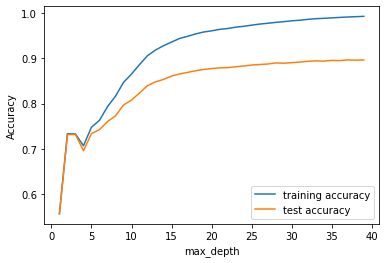

In [102]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Max depth around 15

In [103]:
## Lets tune min sample leaf
# parameters to build the model on
parameters = {'min_samples_leaf': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_leaf': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [104]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.758717,0.072341,0.001598,0.000247,5,{'min_samples_leaf': 5},0.868221,0.870920,0.851779,0.851779,...,0.862423,0.008733,1,0.948402,0.951101,0.946684,0.952144,0.946564,0.948979,0.002278
1,0.608016,0.033723,0.001410,0.000017,25,{'min_samples_leaf': 25},0.792147,0.792638,0.779632,0.767117,...,0.780357,0.010657,2,0.834100,0.827106,0.831585,0.821830,0.820123,0.826949,0.005394
2,0.543953,0.016277,0.001378,0.000007,45,{'min_samples_leaf': 45},0.738160,0.748712,0.746503,0.740613,...,0.741729,0.005206,3,0.769618,0.781336,0.789435,0.783545,0.768896,0.778566,0.008052
3,0.513603,0.019786,0.001381,0.000018,65,{'min_samples_leaf': 65},0.721718,0.745521,0.739877,0.748957,...,0.737656,0.009780,4,0.752255,0.766059,0.766857,0.786060,0.769141,0.768074,0.010774
4,0.498463,0.015942,0.001372,0.000010,85,{'min_samples_leaf': 85},0.711902,0.738650,0.716074,0.732761,...,0.719985,0.013931,8,0.748205,0.757408,0.738696,0.761580,0.730000,0.747178,0.011663


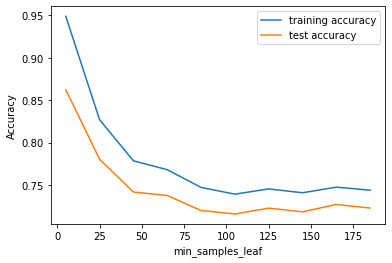

In [105]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Min_samples_leaf seams around 5 to 200


In [106]:
## Tuning min sample split
# parameters to build the model on
parameters = {'min_samples_split': range(5, 200, 20)}

# instantiate the model
dtree = DecisionTreeClassifier(criterion = "gini",class_weight='balanced', random_state = 100)

# fit tree on training data
tree = GridSearchCV(dtree, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)
tree.fit(df_train_pca,y_train)

GridSearchCV(cv=5,
             estimator=DecisionTreeClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'min_samples_split': range(5, 200, 20)},
             return_train_score=True, scoring='accuracy')

In [107]:
# scores of GridSearch CV
scores = tree.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,0.808244,0.096980,0.001654,0.000227,5,{'min_samples_split': 5},0.892515,0.899141,0.890061,0.891779,...,0.894621,0.003965,1,0.996073,0.995460,0.995644,0.995705,0.995828,0.995742,0.000204
1,0.723909,0.044545,0.001500,0.000090,25,{'min_samples_split': 25},0.846135,0.869693,0.845890,0.854479,...,0.856681,0.010126,2,0.934843,0.953126,0.937174,0.938340,0.944969,0.941690,0.006634
2,0.729958,0.046212,0.001493,0.000093,45,{'min_samples_split': 45},0.820613,0.838037,0.816442,0.822822,...,0.827182,0.009081,3,0.897785,0.906681,0.900607,0.896803,0.905644,0.901504,0.004017
3,0.708744,0.054814,0.001466,0.000039,65,{'min_samples_split': 65},0.801718,0.811779,0.799264,0.800000,...,0.805930,0.007094,4,0.867661,0.871587,0.871771,0.866679,0.876871,0.870914,0.003611
4,0.679749,0.048120,0.001418,0.000017,85,{'min_samples_split': 85},0.781350,0.789939,0.783804,0.788957,...,0.787769,0.004742,5,0.838640,0.843487,0.844653,0.852874,0.848589,0.845649,0.004809


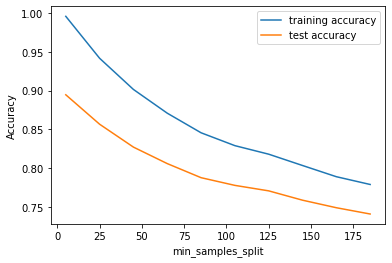

In [108]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_sample_split seems to be around 25

In [109]:
# Create the parameter grid 
param_grid = {
    'max_depth': range(5, 15, 5),
    'min_samples_leaf': range(5, 200, 20),
    'min_samples_split': range(5, 200, 20),
    'criterion': ["entropy", "gini"]
}

n_folds = 5

# Instantiate the grid search model
dtree = DecisionTreeClassifier(class_weight='balanced')
grid_search = GridSearchCV(estimator = dtree, param_grid = param_grid, refit='recall_score',cv = n_folds, verbose = 1, n_jobs = -1)

# Fit the grid search to the data
grid_search.fit(df_train_pca,y_train)

Fitting 5 folds for each of 400 candidates, totalling 2000 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    6.8s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   23.3s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:   54.5s
[Parallel(n_jobs=-1)]: Done 784 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done 1234 tasks      | elapsed:  3.0min
[Parallel(n_jobs=-1)]: Done 1784 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done 2000 out of 2000 | elapsed:  4.4min finished


GridSearchCV(cv=5, estimator=DecisionTreeClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': range(5, 15, 5),
                         'min_samples_leaf': range(5, 200, 20),
                         'min_samples_split': range(5, 200, 20)},
             refit='recall_score', verbose=1)

In [110]:
# cv results
cv_results = pd.DataFrame(grid_search.cv_results_)
cv_results.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.907610,0.002358,0.002847,0.000261,entropy,5,5,5,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.691288,0.628221,0.729571,0.703067,0.73785,0.697999,0.038793,384
1,0.908453,0.006376,0.002505,0.000481,entropy,5,5,25,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.691288,0.627730,0.729571,0.703067,0.73785,0.697901,0.038970,386
2,0.903824,0.002518,0.002202,0.000506,entropy,5,5,45,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.691288,0.627730,0.729571,0.703067,0.73785,0.697901,0.038970,386
3,0.951699,0.037583,0.003210,0.001210,entropy,5,5,65,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.691288,0.627730,0.729571,0.703067,0.73785,0.697901,0.038970,386
4,0.961521,0.014868,0.004101,0.002395,entropy,5,5,85,"{'criterion': 'entropy', 'max_depth': 5, 'min_...",0.691779,0.627730,0.729571,0.703067,0.73785,0.697999,0.038954,384


In [111]:
# printing the optimal accuracy score and hyperparameters
print("best accuracy", grid_search.best_score_)
print(grid_search.best_estimator_)

best accuracy 0.7986157678048134
DecisionTreeClassifier(class_weight='balanced', max_depth=10,
                       min_samples_leaf=5, min_samples_split=5)


In [112]:
# model with optimal hyperparameters
clf_gini = DecisionTreeClassifier(criterion = "gini",class_weight='balanced',
                                  random_state = 100,
                                  max_depth=15, 
                                  min_samples_leaf=5,
                                  min_samples_split=25)
clf_gini.fit(df_train_pca,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=15,
                       min_samples_leaf=5, min_samples_split=25,
                       random_state=100)

In [113]:
y_pred_default = clf_gini.predict(df_test_pca)
confusion_tree_hyper=confusion_matrix(y_test,y_pred_default)
confusion_tree_hyper

array([[6940, 1252],
       [ 259,  281]])

In [114]:
TP = confusion_tree_hyper[1,1] # true positive 
TN = confusion_tree_hyper[0,0] # true negatives
FP = confusion_tree_hyper[0,1] # false positives
FN = confusion_tree_hyper[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Sensitivity:  0.5203703703703704
Specificity:  0.84716796875
false postive rate:  0.15283203125
positive predictive value:  0.18330071754729288
Negative predictive value:  0.9640227809417975
Misclassification Rate:  0.17304168575355017


# RandomForestClassifier with PCA

In [115]:
# Random forest
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')
# fit
rfc.fit(df_train_pca,y_train)
# Making predictions
y_pred_default = rfc.predict(df_test_pca)

In [116]:
# Confusion matrix
confusion_rf=confusion_matrix(y_test,y_pred_default)
confusion_rf

array([[8172,   20],
       [ 520,   20]])

In [117]:
TN = confusion_rf[0,0] # true positive 
TP = confusion_rf[1,1] # true negatives
FP = confusion_rf[0,1] # false positives
FN = confusion_rf[1,0] # false negatives

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))#Lets do some hyper parameter tuning
# max_depth
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf_with_pca = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf_with_pca = GridSearchCV(rf_with_pca, parameters,cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score=True)
rf_with_pca.fit(df_train_pca, y_train)

Sensitivity:  0.037037037037037035
Specificity:  0.99755859375
false postive rate:  0.00244140625
positive predictive value:  0.5
Negative predictive value:  0.9401748734468477
Misclassification Rate:  0.06184150251946862


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [118]:
# scores of GridSearch CV
scores = rf_with_pca.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,3.258109,0.013150,0.056810,0.001034,2,{'max_depth': 2},0.758037,0.762209,0.767853,0.768344,...,0.762491,0.004998,4,0.756918,0.756979,0.765139,0.772133,0.764110,0.763056,0.005700
1,7.936252,0.237524,0.067689,0.003075,7,{'max_depth': 7},0.878528,0.888589,0.877791,0.891043,...,0.884608,0.005419,3,0.907111,0.911099,0.904718,0.909994,0.909264,0.908437,0.002271
2,9.984528,0.102375,0.080117,0.003159,12,{'max_depth': 12},0.923681,0.928834,0.926626,0.927117,...,0.927604,0.002660,2,0.977115,0.977790,0.980367,0.980735,0.979387,0.979079,0.001415
3,9.259478,0.714319,0.060568,0.004695,17,{'max_depth': 17},0.933006,0.938160,0.930061,0.933497,...,0.934770,0.003387,1,0.991595,0.991840,0.991779,0.991717,0.991902,0.991766,0.000106


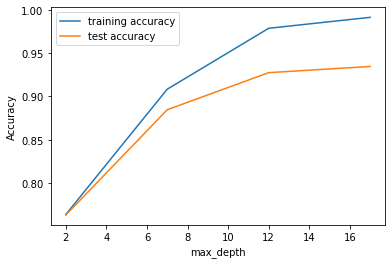

In [119]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_depth seems to be around 12

In [122]:
# Tuning n_estimators
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 1500, 400)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1500, 400)},
             return_train_score=True, scoring='accuracy')

In [123]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,9.413162,0.011314,0.080898,0.000579,100,{'n_estimators': 100},0.916319,0.922699,0.919264,0.925890,...,0.921714,0.003485,4,0.962022,0.964783,0.963617,0.967237,0.966994,0.964931,0.001989
1,47.511515,0.297239,0.384717,0.008523,500,{'n_estimators': 500},0.918282,0.924172,0.922454,0.923926,...,0.922892,0.002515,3,0.965519,0.965703,0.966010,0.967483,0.966748,0.966293,0.000728
2,97.510080,3.903609,0.828538,0.039427,900,{'n_estimators': 900},0.918282,0.925399,0.921718,0.924172,...,0.923088,0.002801,2,0.965703,0.966501,0.966194,0.967299,0.967117,0.966563,0.000588
3,124.992140,11.359184,0.775918,0.113629,1300,{'n_estimators': 1300},0.918037,0.923190,0.922454,0.924417,...,0.923187,0.003168,1,0.965458,0.966378,0.965213,0.967421,0.967730,0.966440,0.001010


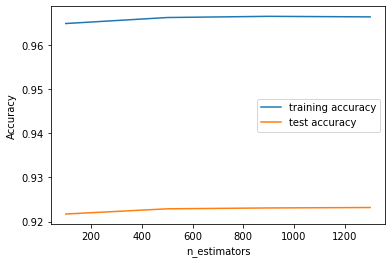

In [124]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimators is around 500

In [125]:
# tuning max_features
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=10,class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [126]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,6.961327,0.008887,0.095148,0.017937,4,{'max_features': 4},0.919018,0.923926,0.922945,0.921472,...,0.921910,0.001659,1,0.964108,0.965274,0.964231,0.964538,0.964540,0.964538,0.000405
1,13.113495,0.142133,0.083357,0.007519,8,{'max_features': 8},0.917546,0.921963,0.920982,0.922699,...,0.921370,0.002105,2,0.962636,0.963986,0.965090,0.965642,0.965031,0.964477,0.001065
2,21.478823,0.060624,0.087718,0.007999,14,{'max_features': 14},0.915092,0.921472,0.920736,0.918528,...,0.920045,0.003108,3,0.961838,0.962881,0.963188,0.964415,0.966748,0.963814,0.001682
3,32.849418,0.432264,0.080117,0.009506,20,{'max_features': 20},0.915092,0.917546,0.916319,0.918037,...,0.918033,0.002765,4,0.963127,0.962513,0.962022,0.960059,0.964172,0.962378,0.001364
4,33.139384,4.045140,0.055707,0.010004,24,{'max_features': 24},0.912393,0.919755,0.915337,0.917791,...,0.917248,0.003085,5,0.961225,0.960672,0.961654,0.961286,0.962515,0.961470,0.000609


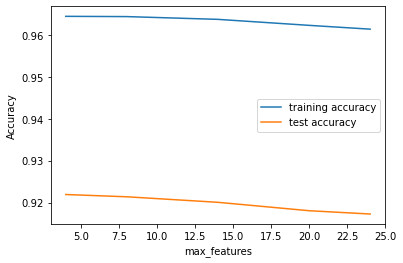

In [127]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"],scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_features"],scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_features is around 13

In [128]:
# Tuning min_samples_leaf
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(100, 400, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'min_samples_leaf': range(100, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [129]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,7.951918,0.025050,0.074812,0.003820,100,{'min_samples_leaf': 100},0.856196,0.863313,0.857669,0.865031,...,0.860803,0.003353,1,0.876557,0.875084,0.879502,0.876802,0.875153,0.876620,0.001603
1,7.231842,0.075845,0.069017,0.002135,150,{'min_samples_leaf': 150},0.840736,0.845399,0.834601,0.846135,...,0.841465,0.004146,2,0.851586,0.856985,0.855329,0.855267,0.854233,0.854680,0.001781
2,6.659259,0.016614,0.074779,0.005728,200,{'min_samples_leaf': 200},0.826258,0.824540,0.828221,0.828957,...,0.827476,0.001821,3,0.834775,0.838518,0.838824,0.841401,0.839571,0.838618,0.002167
3,6.241172,0.028327,0.071570,0.007120,250,{'min_samples_leaf': 250},0.819387,0.820859,0.822577,0.815951,...,0.818641,0.003030,4,0.826431,0.825695,0.839193,0.825633,0.823067,0.828004,0.005709
4,5.759327,0.398341,0.066375,0.006187,300,{'min_samples_leaf': 300},0.807117,0.812761,0.802209,0.812761,...,0.809316,0.004121,5,0.813731,0.813731,0.811277,0.817044,0.818160,0.814788,0.002491


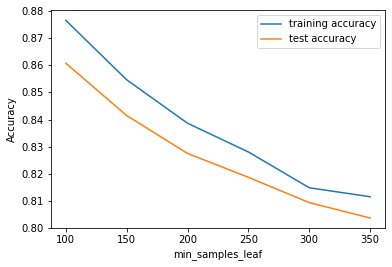

In [130]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"],scores["mean_train_score"],label="training accuracy")
plt.plot(scores["param_min_samples_leaf"],scores["mean_test_score"],label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Min_samples_leaf is around 100

In [131]:
# Min_samples_splits
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(200, 500, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, scoring="accuracy",return_train_score=True)
rf.fit(df_train_pca, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(200, 500, 50)},
             return_train_score=True, scoring='accuracy')

In [132]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.676492,0.132274,0.051854,0.002647,200,{'min_samples_split': 200},0.889080,0.893006,0.895215,0.900123,...,0.894424,0.003571,1,0.918032,0.917541,0.924474,0.923799,0.921350,0.921039,0.002856
1,5.269819,0.079100,0.048080,0.002622,250,{'min_samples_split': 250},0.875828,0.884417,0.884172,0.885890,...,0.882399,0.003552,2,0.906068,0.905761,0.911590,0.905516,0.906258,0.907038,0.002290
2,5.169478,0.095070,0.046610,0.001884,300,{'min_samples_split': 300},0.868957,0.877791,0.868957,0.878773,...,0.872877,0.004438,3,0.892631,0.893122,0.896435,0.895515,0.890859,0.893713,0.002016
3,5.015927,0.074350,0.047859,0.004368,350,{'min_samples_split': 350},0.854969,0.867485,0.867975,0.867975,...,0.864190,0.005045,4,0.878152,0.880790,0.886803,0.884410,0.880184,0.882068,0.003112
4,4.906734,0.045902,0.045257,0.001909,400,{'min_samples_split': 400},0.852025,0.854479,0.856933,0.859877,...,0.855109,0.002975,5,0.872385,0.872017,0.877170,0.876434,0.872209,0.874043,0.002268


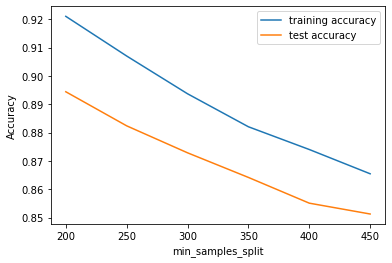

In [133]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Min_samples_split is around 200

In [134]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [8,10],
    'min_samples_leaf': range(100, 200, 100),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': range(200, 400, 100), 
    'max_features': [8, 10, 12]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score' ,cv = 5, n_jobs=-1, verbose = 1)
# Fit the grid search to the data
grid_search.fit(df_train_pca, y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  2.1min
[Parallel(n_jobs=-1)]: Done 120 out of 120 | elapsed:  8.0min finished


GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [8, 10], 'max_features': [8, 10, 12],
                         'min_samples_leaf': range(100, 200, 100),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': range(200, 400, 100)},
             refit='recall_score', verbose=1)

In [135]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8594776632302406 using {'max_depth': 10, 'max_features': 8, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


In [136]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True, class_weight='balanced',
                             max_depth=12,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=13,
                             n_estimators=500)

In [140]:
# fit
rfc.fit(df_train_pca,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=12, max_features=13,
                       min_samples_leaf=100, min_samples_split=200,
                       n_estimators=500)

In [141]:
# predict
y_pred_default = rfc.predict(df_test_pca)

In [142]:
print(classification_report(y_test,y_pred_default))
print(confusion_matrix(y_test,y_pred_default))
print('accuracy_score:  ',accuracy_score(y_test,y_pred_default))

              precision    recall  f1-score   support

           0       0.98      0.87      0.92      8192
           1       0.25      0.68      0.37       540

    accuracy                           0.86      8732
   macro avg       0.62      0.77      0.64      8732
weighted avg       0.93      0.86      0.89      8732

[[7116 1076]
 [ 173  367]]
accuracy_score:   0.8569628950984883


In [143]:
# Confusion Matrix
confusion_rf_hyper=confusion_matrix(y_test,y_pred_default)
confusion_rf_hyper

array([[7116, 1076],
       [ 173,  367]])

In [144]:
TN = confusion_rf_hyper[0,0] # true positive 
TP = confusion_rf_hyper[1,1] # true negatives
FP = confusion_rf_hyper[0,1] # false positives
FN = confusion_rf_hyper[1,0] # false negatives

print('Accuracy Score:  ',accuracy_score(y_test,y_pred_default))

# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:   0.8569628950984883
Sensitivity:  0.6796296296296296
Specificity:  0.86865234375
false postive rate:  0.13134765625
positive predictive value:  0.2543312543312543
Negative predictive value:  0.9762656057072301
Misclassification Rate:  0.14303710490151167


**Recomendation for Model Selection

**Logistic Regression and Random Forest performed better than Decision Tree for customer churn analysis for this particular dataset, using PCA.

LogisticRegression is the best model 80.9% Sensitivity

Accuracy of RandomForest is highest with 85.6%

LogisticRegression

Accuracy Score : 0.809436555199267 (With PCA on Test)

Sensitivity: 0.8092592592592592 (with PCA)

Accuracy Score : 0.8121850664223546 (With RFE on Test)

Sensitivity: 0.8122699386503067 (with RFE)

**RandomForest

Accuracy Score: 0.8566193311956024

Sensitivity: 0.6759259259259259

DecisionTree

Sensitivity: 0.512962962962963 (with PCA)


# Random Forest on all feature¶

In [145]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [146]:
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced')

In [147]:
# Making predictions
predictions = rfc.predict(X_test)

In [148]:
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
print(accuracy_score(y_test,predictions))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      8192
           1       0.62      0.18      0.28       540

    accuracy                           0.94      8732
   macro avg       0.79      0.59      0.63      8732
weighted avg       0.93      0.94      0.93      8732

[[8132   60]
 [ 441   99]]
0.9426248282180486


In [149]:
# Confusion Matrix
confusion_rf_with_all_feature=confusion_matrix(y_test,predictions)
confusion_rf_with_all_feature

array([[8132,   60],
       [ 441,   99]])

In [150]:
TN = confusion_rf_with_all_feature[0,0] # true positive 
TP = confusion_rf_with_all_feature[1,1] # true negatives
FP = confusion_rf_with_all_feature[0,1] # false positives
FN = confusion_rf_with_all_feature[1,0] # false negatives

print('Accuracy Score: ', accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.9426248282180486
Sensitivity:  0.18333333333333332
Specificity:  0.99267578125
false postive rate:  0.00732421875
positive predictive value:  0.6226415094339622
Negative predictive value:  0.9485594307710253
Misclassification Rate:  0.057375171781951444


In [151]:
# Hyyperparameter tuning
# Tuning max_depth
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_depth': range(2, 20, 5)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds,scoring="accuracy", n_jobs=-1,return_train_score=True)

In [152]:
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1, param_grid={'max_depth': range(2, 20, 5)},
             return_train_score=True, scoring='accuracy')

In [153]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.644156,0.025991,0.059477,0.001135,2,{'max_depth': 2},0.857423,0.837301,0.841718,0.851288,...,0.849171,0.008357,4,0.861648,0.839438,0.850604,0.850727,0.854356,0.851355,0.007182
1,3.963236,0.108311,0.094199,0.002022,7,{'max_depth': 7},0.904785,0.905521,0.901595,0.904785,...,0.904781,0.001824,3,0.921774,0.918829,0.917296,0.918400,0.917669,0.918794,0.001584
2,5.201090,0.098304,0.118896,0.002280,12,{'max_depth': 12},0.932761,0.936933,0.936933,0.938160,...,0.937028,0.002473,2,0.975275,0.974600,0.974661,0.975275,0.974663,0.974894,0.000311
3,4.725145,0.417598,0.079516,0.023269,17,{'max_depth': 17},0.939877,0.944294,0.940368,0.942086,...,0.942476,0.002254,1,0.990429,0.990490,0.990674,0.990920,0.991350,0.990773,0.000335


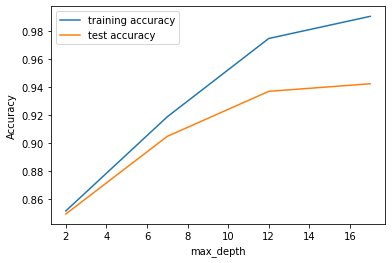

In [154]:
# plotting accuracies with max_depth
plt.figure()
plt.plot(scores["param_max_depth"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_depth"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Max_depth around 10

In [155]:
# Tuning n_estimator
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'n_estimators': range(100, 1000, 400)}
# instantiate the model (note we are specifying a max_depth)
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters,cv=n_folds, scoring="accuracy", n_jobs=-1, return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             n_jobs=-1, param_grid={'n_estimators': range(100, 1000, 400)},
             return_train_score=True, scoring='accuracy')

In [156]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,5.043417,0.054790,0.144446,0.005869,100,{'n_estimators': 100},0.926626,0.928834,0.930307,0.929816,...,0.929469,0.001707,2,0.959384,0.959629,0.959323,0.959323,0.957239,0.958980,0.000877
1,24.601389,0.256077,0.500641,0.022758,500,{'n_estimators': 500},0.926135,0.928098,0.928344,0.931779,...,0.929125,0.002110,3,0.960059,0.959261,0.960243,0.958709,0.957914,0.959237,0.000862
2,35.613544,4.069510,0.592318,0.098405,900,{'n_estimators': 900},0.925153,0.930061,0.928098,0.932270,...,0.929862,0.003035,1,0.960304,0.959629,0.959752,0.959445,0.958405,0.959507,0.000621


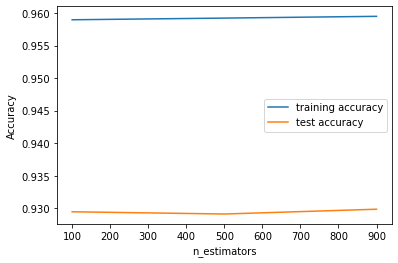

In [157]:
# plotting accuracies with n_estimators
plt.figure()
plt.plot(scores["param_n_estimators"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_n_estimators"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("n_estimators")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

n_estimators is around 500

In [158]:
# Tuning max_features
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'max_features': [4, 8, 14, 20, 24]}
# instantiate the model
rf = RandomForestClassifier(max_depth=10, class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestClassifier(class_weight='balanced',
                                              max_depth=10),
             param_grid={'max_features': [4, 8, 14, 20, 24]},
             return_train_score=True, scoring='accuracy')

In [159]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,1.731861,0.037673,0.061653,0.004677,4,{'max_features': 4},0.922699,0.924908,0.921963,0.929571,...,0.925543,0.003056,4,0.956010,0.954598,0.953433,0.955273,0.951350,0.954133,0.001629
1,3.084272,0.028810,0.065535,0.002678,8,{'max_features': 8},0.923190,0.929080,0.927607,0.928589,...,0.927702,0.002389,1,0.958893,0.958893,0.957666,0.959200,0.957178,0.958366,0.000794
2,4.879490,0.193535,0.057483,0.002228,14,{'max_features': 14},0.918528,0.928589,0.926871,0.929325,...,0.926770,0.004289,2,0.958648,0.959752,0.960182,0.959936,0.957853,0.959274,0.000884
3,6.224735,0.111944,0.055146,0.004085,20,{'max_features': 20},0.919755,0.925644,0.926871,0.926135,...,0.925739,0.003405,3,0.957912,0.958586,0.958955,0.957114,0.957055,0.957924,0.000763
4,7.324113,0.094442,0.052230,0.002171,24,{'max_features': 24},0.918773,0.926135,0.926871,0.926626,...,0.925150,0.003212,5,0.958464,0.955948,0.956194,0.960550,0.955951,0.957421,0.001828


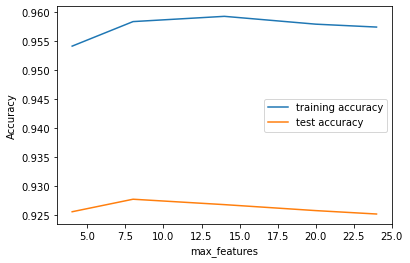

In [160]:
# plotting accuracies with max_features
plt.figure()
plt.plot(scores["param_max_features"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_max_features"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("max_features")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

max_features is around 8

In [161]:
# Tuning min_sample_leaf
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_leaf': range(50, 400, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_leaf': range(50, 400, 50)},
             return_train_score=True, scoring='accuracy')

In [162]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_leaf,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.598289,0.092639,0.052939,0.001923,50,{'min_samples_leaf': 50},0.893252,0.894724,0.887362,0.890798,...,0.892707,0.003423,1,0.906743,0.905945,0.906497,0.902877,0.905706,0.905554,0.001389
1,2.274920,0.022914,0.048673,0.000453,100,{'min_samples_leaf': 100},0.874847,0.872638,0.867730,0.881718,...,0.874252,0.004500,2,0.882754,0.879502,0.884717,0.886557,0.879325,0.882571,0.002846
2,2.088443,0.019407,0.047459,0.001613,150,{'min_samples_leaf': 150},0.865521,0.868712,0.854479,0.874601,...,0.865171,0.006676,3,0.875023,0.872569,0.867845,0.875698,0.866196,0.871466,0.003812
3,1.943746,0.023458,0.046586,0.001227,200,{'min_samples_leaf': 200},0.853988,0.861350,0.848344,0.863804,...,0.857024,0.005470,4,0.865391,0.862261,0.864102,0.865943,0.858712,0.863282,0.002613
4,1.844147,0.022512,0.044389,0.000991,250,{'min_samples_leaf': 250},0.854233,0.850552,0.850061,0.856196,...,0.854030,0.003416,5,0.864163,0.854224,0.862630,0.852690,0.858589,0.858459,0.004498


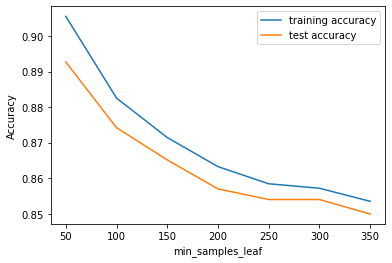

In [163]:
# plotting accuracies with min_samples_leaf
plt.figure()
plt.plot(scores["param_min_samples_leaf"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_leaf"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_leaf")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_sample_leaf is around 100

In [164]:
#Tuning min_sample_split
# specify number of folds for k-fold CV
n_folds = 5
# parameters to build the model on
parameters = {'min_samples_split': range(100, 700, 50)}
# instantiate the model
rf = RandomForestClassifier(class_weight='balanced')
# fit tree on training data
rf = GridSearchCV(rf, parameters, cv=n_folds, scoring="accuracy",return_train_score=True)
rf.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(class_weight='balanced'),
             param_grid={'min_samples_split': range(100, 700, 50)},
             return_train_score=True, scoring='accuracy')

In [165]:
# scores of GridSearch CV
scores = rf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,2.850903,0.146814,0.052957,0.000582,100,{'min_samples_split': 100},0.909202,0.911656,0.909448,0.912638,...,0.911652,0.002248,1,0.935456,0.930364,0.931959,0.931039,0.932086,0.932181,0.001755
1,2.655062,0.027232,0.051359,0.000406,150,{'min_samples_split': 150},0.895460,0.900368,0.895460,0.906503,...,0.900707,0.004778,2,0.916191,0.912387,0.914473,0.915700,0.914110,0.914573,0.001333
2,2.566392,0.015206,0.051191,0.002913,200,{'min_samples_split': 200},0.889816,0.887362,0.886380,0.894233,...,0.891038,0.004180,3,0.907234,0.899442,0.903000,0.901834,0.904847,0.903271,0.002645
3,2.486234,0.028360,0.049177,0.000361,250,{'min_samples_split': 250},0.884172,0.884908,0.879755,0.885644,...,0.884559,0.002780,4,0.896681,0.893490,0.895883,0.894533,0.892883,0.894694,0.001422
4,2.431219,0.026565,0.048716,0.000774,300,{'min_samples_split': 300},0.876564,0.876319,0.874356,0.880491,...,0.878522,0.003751,5,0.889380,0.886005,0.893122,0.884533,0.889080,0.888424,0.002980


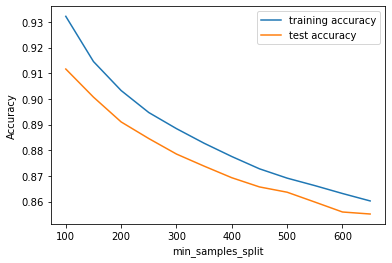

In [166]:
# plotting accuracies with min_samples_split
plt.figure()
plt.plot(scores["param_min_samples_split"], scores["mean_train_score"], label="training accuracy")
plt.plot(scores["param_min_samples_split"], scores["mean_test_score"], label="test accuracy")
plt.xlabel("min_samples_split")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

min_sample_splits are around 150

In [167]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [10,12],
    'min_samples_leaf': range(150, 250, 50),
    'min_samples_split': range(200, 400, 100),
    'n_estimators': [300,400,500], 
    'max_features': [15, 20]
}
# Create a based model
rf = RandomForestClassifier(class_weight='balanced')
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid,refit='recall_score',cv = 3, verbose = 1, n_jobs=-1)
# fit
grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 48 candidates, totalling 144 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:  1.7min
[Parallel(n_jobs=-1)]: Done 144 out of 144 | elapsed:  7.8min finished


GridSearchCV(cv=3, estimator=RandomForestClassifier(class_weight='balanced'),
             n_jobs=-1,
             param_grid={'max_depth': [10, 12], 'max_features': [15, 20],
                         'min_samples_leaf': range(150, 250, 50),
                         'min_samples_split': range(200, 400, 100),
                         'n_estimators': [300, 400, 500]},
             refit='recall_score', verbose=1)

In [168]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8516737709214319 using {'max_depth': 12, 'max_features': 15, 'min_samples_leaf': 150, 'min_samples_split': 300, 'n_estimators': 500}


In [169]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc_final = RandomForestClassifier(bootstrap=True,class_weight='balanced',
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=150,
                             max_features=8,
                             n_estimators=500)

In [170]:
# fit
rfc_final.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', max_depth=10, max_features=8,
                       min_samples_leaf=100, min_samples_split=150,
                       n_estimators=500)

In [171]:
# predict
predictions = rfc_final.predict(X_test)

In [172]:
#Confusion matrix
confusion_rm_f = metrics.confusion_matrix( y_test, predictions )
confusion_rm_f

array([[7269,  923],
       [ 123,  417]])

In [173]:
TN = confusion_rm_f[0,0] # true positive 
TP = confusion_rm_f[1,1] # true negatives
FP = confusion_rm_f[0,1] # false positives
FN = confusion_rm_f[1,0] # false negatives

print('Accuracy Score: ',accuracy_score(y_test,predictions))
# Let's see the sensitivity of our logistic regression model
print('Sensitivity: ', TP / float(TP+FN))

# Let us calculate specificity
print('Specificity: ',TN / float(TN+FP))

# Calculate false postive rate - predicting churn when customer does not have churned
print('false postive rate: ',FP/ float(TN+FP))

# positive predictive value 
print('positive predictive value: ', TP / float(TP+FP))

# Negative predictive value
print('Negative predictive value: ',TN / float(TN+ FN))

## Misclassification rate

print('Misclassification Rate: ',(FN+FP)/(TP+TN+FP+FN))

Accuracy Score:  0.88021071919377
Sensitivity:  0.7722222222222223
Specificity:  0.8873291015625
false postive rate:  0.1126708984375
positive predictive value:  0.3111940298507463
Negative predictive value:  0.9833603896103896
Misclassification Rate:  0.11978928080622996


# RandomForest model with All feature gives:

87.9% of Accuracy and 76.67% of Sensitivity

In [174]:
#Important Variables
feature_names=list(X_train.columns.values)
important_features_dict = {}
for name, importance in zip(feature_names, rfc_final.feature_importances_):
    important_features_dict[name]=importance
#Sorting Dictionary in descending order of the importance variable
d_descending = OrderedDict(sorted(important_features_dict.items(), key=lambda kv: kv[1], reverse=True))

In [175]:
telecom_df2.columns

Index(['mobile_number', 'arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6',
       'offnet_mou_6', 'roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8',
       'loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6',
       'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8',
       'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8',
       'isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6',
       'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'loc_ic_t2t_mou_6',
       'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'std_ic_t2t_mou_6',
       'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6',
       'std_ic_t2m_mou_7', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7',
       'std_ic_t2f_mou_8', 'isd_ic_mou_6', 'ic_others_6', 'ic_others_7',
       'ic_others_8', 'total_rech_num_6', 'total_rech_num_7', 'max_rech_amt_6',
       'max_rech_amt_7', 'max_rech_amt_8', 'date_of_last_rech_6',
       'date_of_last_rech_7', 'date_of_last_rech_8', 'last_day_rch_amt_6',
       'last_day

In [176]:
#Variable Importance top 12 variable
dic= dict(d_descending)
def take(n, iterable):
    "Return first n items of the iterable as a list"
    return list(islice(iterable, n))
n=12
n_items = take(n, dic.items())

In [177]:
print('These are top 12 driver variable: ',n_items)

These are top 12 driver variable:  [('roam_ic_mou_8', 0.19205627816041732), ('last_day_rch_amt_8', 0.13069520452248598), ('arpu_8', 0.121492029173896), ('date_of_last_rech_8', 0.0997848081876802), ('max_rech_amt_8', 0.07256399535628211), ('roam_ic_mou_7', 0.02765938053372377), ('loc_og_t2m_mou_6', 0.024003050265052835), ('std_ic_t2f_mou_8', 0.022226515296030237), ('loc_ic_t2f_mou_6', 0.02210343150701687), ('loc_og_t2f_mou_6', 0.02087857806068162), ('std_ic_t2t_mou_8', 0.0181770355584948), ('spl_og_mou_8', 0.01742806276565933)]


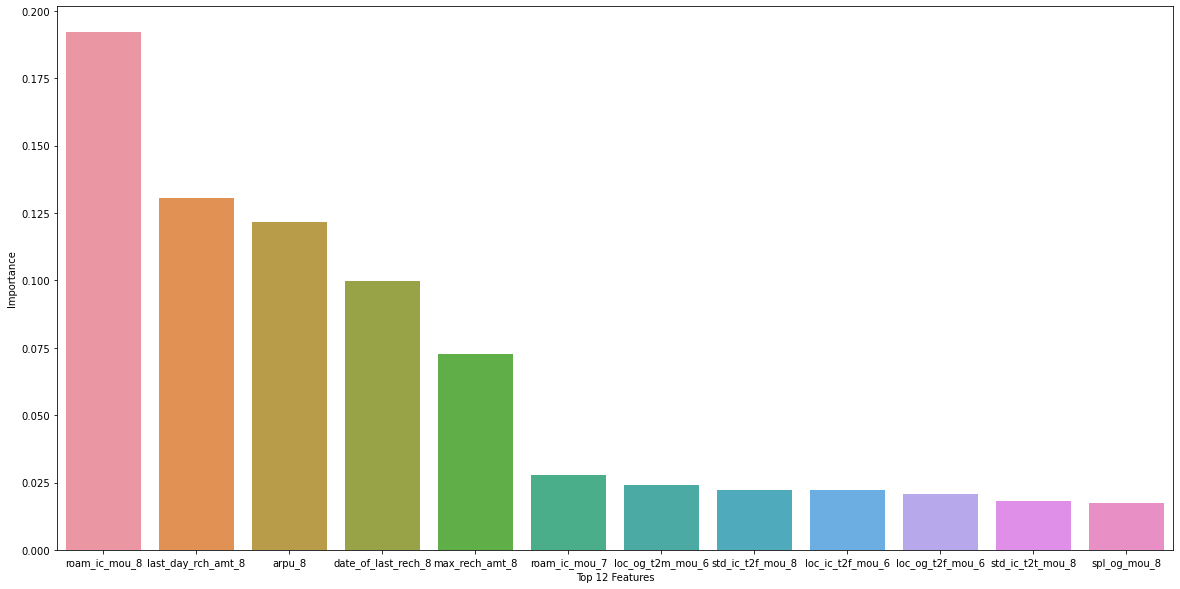

In [178]:
imp=rfc_final.feature_importances_
names=X_train.columns.values
imp,names=zip(*sorted(zip(imp,names)))
df_1=pd.DataFrame({"Variable":names,"importance":imp})
df_2 = df_1.sort_values(by="importance",axis=0,ascending=False)
df_2 = df_2.reset_index(drop=True)
plt.figure(figsize=(20, 10))
ax = sns.barplot(x='Variable', y= 'importance', data=df_2[0:12])
ax.set(xlabel = 'Top 12 Features', ylabel = 'Importance')
plt.show()

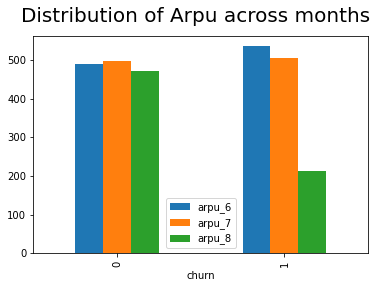

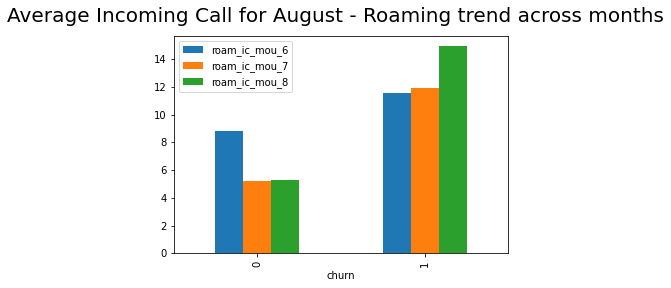

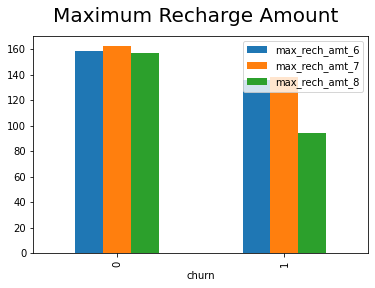

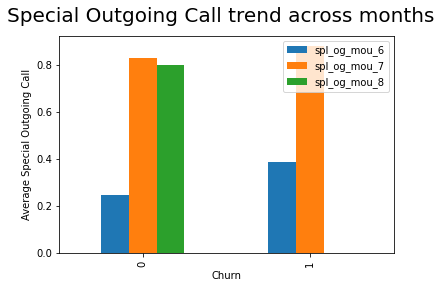

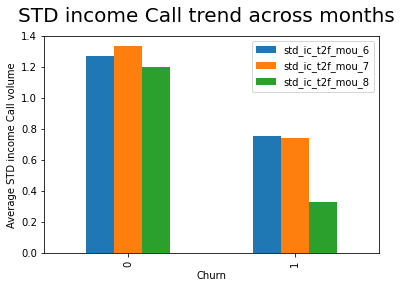

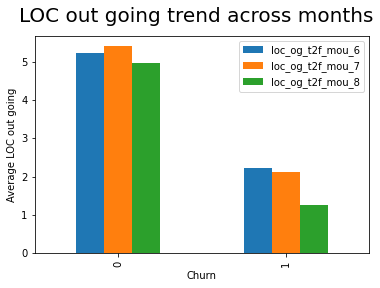

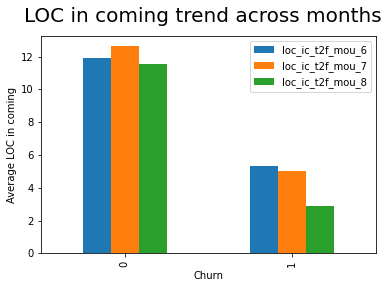

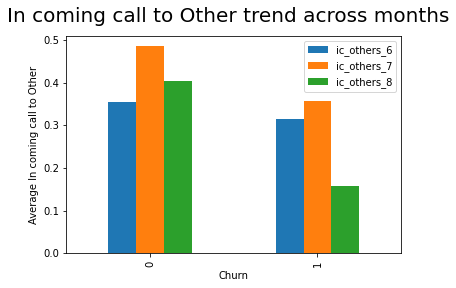

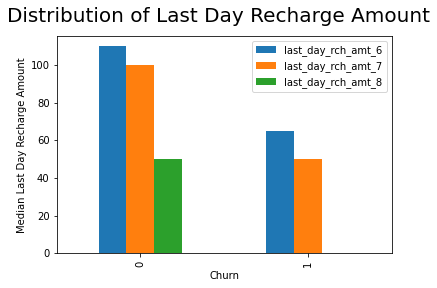

In [179]:
# Plotting 
df1['churn'] = df1['churn'].astype('object', copy = False)
df_sample = df1.groupby(['churn'])['arpu_6', 'arpu_7', 'arpu_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Arpu across months', fontsize=20)
plt.show()

df_sample = df1.groupby(['churn'])['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('Average Incoming Call for August - Roaming trend across months', fontsize=20)
plt.show()

df_sample = df1.groupby(['churn'])['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'].mean()
df_sample.plot.bar()
plt.suptitle('Maximum Recharge Amount', fontsize=20)
plt.show()


df_sample = df1.groupby(['churn'])['spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8'].median()
df_sample.plot.bar()
plt.suptitle('Special Outgoing Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average Special Outgoing Call")
plt.show()


df_sample = df1.groupby(['churn'])['std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('STD income Call trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average STD income Call volume")
plt.show()

df_sample = df1.groupby(['churn'])['loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC out going trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC out going")
plt.show()

df_sample = df1.groupby(['churn'])['loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8'].mean()
df_sample.plot.bar()
plt.suptitle('LOC in coming trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average LOC in coming")
plt.show()

df_sample = df1.groupby(['churn'])['ic_others_6', 'ic_others_7', 'ic_others_8'].mean()
df_sample.plot.bar()
plt.suptitle('In coming call to Other trend across months', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Average In coming call to Other")
plt.show()

df1['churn'] = df1['churn'].astype('object', copy = False)
df_sample = df1.groupby(['churn'])['last_day_rch_amt_6', 'last_day_rch_amt_7', 'last_day_rch_amt_8'].median()
df_sample.plot.bar()
plt.suptitle('Distribution of Last Day Recharge Amount', fontsize=20)
plt.xlabel("Churn")
plt.ylabel("Median Last Day Recharge Amount")
plt.show()

<AxesSubplot:xlabel='date_of_last_rech_8', ylabel='churn'>

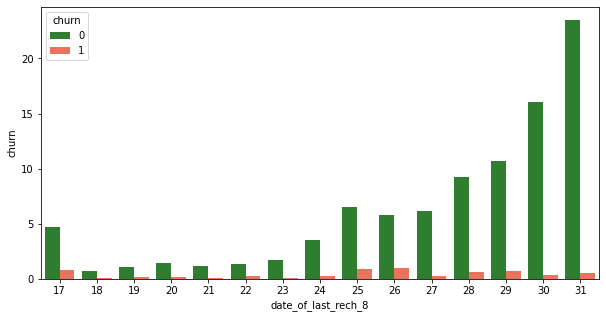

In [180]:
plt.figure(figsize=(10,5))
palette = ["#228B22", "#FF6347"]
sns.barplot(x="date_of_last_rech_8", y="churn", hue="churn", data=telecom_df2, palette=palette, 
            estimator=lambda x: len(x) / len(telecom_df2) * 100)

## Driver Variables of Churn and Churn Analysis & Recommendation

**The telecom churn analysis is required to predict the customer churn behavior i.e., if a particular customer is likely to churn or not churn. As the problem preview said -

**"In this highly competitive market, the telecommunications industry experiences an average of 15-25% annual churn rate. Given the fact that it costs 5-10 times more to acquire a new customer than to retain an existing one, customer retention has now become even more important than customer acquisition."



**ARPU 7th and 8th - Average Revenue Per User decreases from 6th to 7th month to 8th month as most of the users are churned by 8th month.

**date_of_last_rech_8 - Most of the Users are churned between 25th to 31st of the month. Hence providing offers prior to 25th can reduce the churn. Send out periodic offers to customers between 15th of the month to 25th of the month.

**last_day_rch_amt_8 - Lower the last day recharge amount higher the churn rate. Focus on customers whos last day recharge amount has decrased. Specialy for customers without any recharge amount.

**roam_ic_mou_8 - Higher the incoming roaming amount, higher is the churn rate. Focus on customers whose incoming roaming amount has increased, because they are likely to churn.

**std_ic_t2f_mou_8 - Lower the STD incoming call, higher is the churn rate. Focus on customers whose STD incoming call amount has decreased for that month.

**max_rech_amt_8- Focus on the customer whoes Avg max recharge amount has been decreased.